## Data Understanding and Preparation

### Merging train and test datasets

In [355]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [356]:
#file path
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [357]:
#reading the data (train and test) and merging them together for exploratory analysis and data preparation
train_data = pd.read_csv("data/RavdessAudioOnlyFeatures_TRAIN.csv", skipinitialspace=True)
test_data = pd.read_csv("data/RavdessAudioOnlyFeatures_TEST.csv", skipinitialspace=True)
df = pd.concat([train_data, test_data], ignore_index=True)
df.head()

modality vocal_channel  emotion emotional_intensity  \
0  audio-only        speech  neutral              normal   
1  audio-only        speech  neutral              normal   
2  audio-only        speech  neutral              normal   
3  audio-only        speech  neutral              normal   
4  audio-only        speech     calm              normal   

                      statement repetition  actor sex  \
0  Kids are talking by the door        1st      1   M   
1  Kids are talking by the door        2nd      1   M   
2  Dogs are sitting by the door        1st      1   M   
3  Dogs are sitting by the door        2nd      1   M   
4  Kids are talking by the door        1st      1   M   

                   filename  frame_count       sum          mean       std  \
0  03-01-01-01-01-01-01.wav       158558  0.145081  9.150000e-07  0.004001   
1  03-01-01-01-01-02-01.wav       160160  0.114319  7.137790e-07  0.004283   
2  03-01-01-01-02-01-01.wav       156956  0.149963  9.554485e-07  0.005084   
3  03-01-01-01-02-02-01.wav       152152  0.139618  9.176213e-07  0.004886   
4  03-01-02-01-01-01-01.wav       169769  0.137665  8.108948e-07  0.002956   

        min       max       q01       q05       q25  q50  q75       q95  \
0 -0.038422  0.040588 -0.012586 -0.005890 -0.000031  0.0  0.0  0.005676   
1 -0.042603  0.048157 -0.013550 -0.006104 -0.000031  0.0  0.0  0.005920   
2 -0.037018  0.058472 -0.015822 -0.007294  0.000000  0.0  0.0  0.007263   
3 -0.036652  0.062683 -0.014923 -0.006714 -0.000031  0.0  0.0  0.006470   
4 -0.026245  0.026215 -0.009399 -0.004364 -0.000031  0.0  0.0  0.004242   

        q99        kur      skew  lag1_sum     lag1_mean  lag1_std  lag1_min  \
0  0.015272  15.028520  0.904033  0.000000  0.000000e+00  0.000511 -0.010895   
1  0.015900  16.488415  1.001578  0.000000  0.000000e+00  0.000540 -0.009949   
2  0.018494  17.035218  1.269509 -0.000061 -3.888704e-10  0.000873 -0.017578   
3  0.017487  21.824521  1.799676 -0.000031 -2.005743e-10  0.000907 -0.015930   
4  0.011566  13.236022  0.619367 -0.000031 -1.797605e-10  0.000397 -0.007568   

   lag1_max  lag1_q01  lag1_q05  lag1_q25  lag1_q50  lag1_q75  lag1_q95  \
0  0.018311 -0.001617 -0.000519       0.0       0.0       0.0  0.000519   
1  0.010834 -0.001740 -0.000549       0.0       0.0       0.0  0.000549   
2  0.019470 -0.002747 -0.000732       0.0       0.0       0.0  0.000732   
3  0.020142 -0.002991 -0.000732       0.0       0.0       0.0  0.000732   
4  0.006653 -0.001251 -0.000397       0.0       0.0       0.0  0.000397   

   lag1_q99   lag1_kur  lag1_skew  zc_sum   zc_mean    zc_std  zc_min  zc_max  \
0  0.001709  51.787204   0.666148    8015  0.050549  0.219076       0       1   
1  0.001831  42.127435   0.887835    8491  0.053016  0.224065       0       1   
2  0.002899  54.529269   0.321683    7384  0.047045  0.211735       0       1   
3  0.003021  53.008445   0.828707    8237  0.054137  0.226287       0       1   
4  0.001343  44.373537   0.341361    7839  0.046175  0.209863       0       1   

   zc_q01  zc_q05  zc_q25  zc_q50  zc_q75  zc_q95  zc_q99     zc_kur  \
0     0.0     0.0     0.0     0.0     0.0     1.0     1.0  14.835898   
1     0.0     0.0     0.0     0.0     0.0     1.0     1.0  13.918309   
2     0.0     0.0     0.0     0.0     0.0     0.0     1.0  16.305597   
3     0.0     0.0     0.0     0.0     0.0     1.0     1.0  13.529009   
4     0.0     0.0     0.0     0.0     0.0     0.0     1.0  16.705381   

    zc_skew       mfcc_sum  mfcc_mean    mfcc_std    mfcc_min    mfcc_max  \
0  4.103157 -197329.278906 -31.827303  165.355352 -861.532578  236.703871   
1  3.989776 -196963.570413 -31.463829  163.853142 -861.443935  218.363733   
2  4.278504 -193866.638041 -31.574371  163.238841 -851.233799  229.029214   
3  3.940686 -184150.973286 -30.897814  162.217347 -847.867170  216.240664   
4  4.324972 -218952.728640 -32.974809  172.859991 -917.402654  230.432203   

     mfcc_q01    mfcc_q05  mfcc_q25  mfcc_q50  mfcc_q75   mfcc_q95

In [358]:
#how many rows and columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Columns: 434 entries, modality to stft_skew_w4
dtypes: float64(405), int64(21), object(8)
memory usage: 8.1+ MB


In [359]:
int_feat = []
for col in df.columns:
    if df[col].dtype == 'int64':
        int_feat.append(col)
df[int_feat].nunique()

actor            24
frame_count     157
zc_sum         2176
zc_min            1
zc_max            1
length_w1       110
zc_sum_w1      1988
zc_min_w1         1
zc_max_w1         1
length_w2       112
zc_sum_w2      1918
zc_min_w2         1
zc_max_w2         1
length_w3       110
zc_sum_w3      1460
zc_min_w3         1
zc_max_w3         1
length_w4       110
zc_sum_w4      1929
zc_min_w4         1
zc_max_w4         1
dtype: int64

### Checking for missing values, duplicates, irrelevant features, semantic/syntactic inconsistencies

In [360]:
#numerical variables' descriptive statistics -> ACTOR is meaningless!
df.describe()

actor    frame_count          sum          mean          std  \
count  2452.000000    2452.000000  2452.000000  2.452000e+03  2452.000000   
mean     12.401305  196423.314029     0.007907  1.393648e-08     0.020504   
std       6.945763   28720.440045     8.060870  4.267587e-05     0.021024   
min       1.000000  140941.000000  -151.120178 -9.435576e-04     0.000652   
25%       6.000000  172973.000000    -0.276253 -1.394488e-06     0.006791   
50%      12.000000  192192.000000    -0.017593 -9.810701e-08     0.013880   
75%      19.000000  217818.000000     0.164978  8.363511e-07     0.026154   
max      24.000000  305906.000000   240.889893  1.222810e-03     0.152168   

               min          max          q01          q05          q25  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean     -0.164871     0.179839    -0.068359    -0.032054    -0.001072   
std       0.175443     0.195539     0.070798     0.032106     0.001650   
min      -0.998810     0.004669    -0.492982    -0.246616    -0.015625   
25%      -0.202431     0.055489    -0.085106    -0.041563    -0.001312   
50%      -0.103775     0.109726    -0.045678    -0.022217    -0.000427   
75%      -0.054352     0.224487    -0.022949    -0.010719    -0.000092   
max      -0.006134     0.999146    -0.002441    -0.000580     0.000000   

                q50          q75          q95          q99          kur  \
count  2.452000e+03  2452.000000  2452.000000  2452.000000  2452.000000   
mean   5.102858e-07     0.001138     0.031533     0.068519    11.203001   
std    9.907241e-06     0.001443     0.032070     0.074291     6.614859   
min   -9.155273e-05     0.000000     0.000641     0.002136     1.757795   
25%    0.000000e+00     0.000122     0.010170     0.021391     6.519989   
50%    0.000000e+00     0.000549     0.021286     0.044128     9.828683   
75%    0.000000e+00     0.001648     0.040466     0.085481    14.085434   
max    2.746582e-04     0.011963     0.245026     0.551903    59.085710   

              skew      lag1_sum     lag1_mean     lag1_std     lag1_min  \
count  2452.000000  2.452000e+03  2.452000e+03  2452.000000  2452.000000   
mean     -0.048245  4.107178e-07 -1.382010e-11     0.003981    -0.060939   
std       0.454925  8.860477e-04  4.536689e-09     0.004316     0.058494   
min      -2.356525 -2.069092e-02 -1.085630e-07     0.000095    -0.472412   
25%      -0.336624  0.000000e+00  0.000000e+00     0.001225    -0.079559   
50%       0.004256  0.000000e+00  0.000000e+00     0.002501    -0.042313   
75%       0.262978  0.000000e+00  0.000000e+00     0.004902    -0.021393   
max       1.799676  2.539062e-02  1.248298e-07     0.035097    -0.002533   

          lag1_max     lag1_q01     lag1_q05     lag1_q25  lag1_q50  \
count  2452.000000  2452.000000  2452.000000  2452.000000    2452.0   
mean      0.063723    -0.012623    -0.004847    -0.000193       0.0   
std       0.062043     0.014086     0.006053     0.000261       0.0   
min       0.002686    -0.114529    -0.053802    -0.002167       0.0   
25%       0.022400    -0.015724    -0.005867    -0.000244       0.0   
50%       0.044098    -0.007690    -0.002747    -0.000092       0.0   
75%       0.081665    -0.003693    -0.001213    -0.000031       0.0   
max       0.480804    -0.000244    -0.000061     0.000000       0.0   

          lag1_q75     lag1_q95     lag1_q99     lag1_kur    lag1_skew  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.000117     0.004960     0.013704    41.488063     0.426090   
std       0.000179     0.006100     0.015165    34.384616     0.379385   
min       0.000000     0.000061     0.000244     6.646214    -0.880768   
25%       0.000031     0.001221     0.004059    20.615408     0.169080   
50%       0.000061     0.002838     0.008423    33.060464     0.353566   
75%       0.000122     0.006012     0.017159    50.881080     0.617419   
max       0.001984     0.053070     0.120175   720.266619  

In [361]:
#duplicates
df.duplicated().sum()

0

In [362]:
#categorical variables' classes, frequencies and missing values
cat_vars = ['modality','vocal_channel','emotion','emotional_intensity','statement','repetition','actor','sex','filename']
for var in df[cat_vars]:
    print(f'unique values for {var}:\n{df[var].value_counts()}')
    print(f'missing values for {var}: {df[var].isna().sum()}')
    print('__________________________________________')

unique values for modality:
audio-only    2452
Name: modality, dtype: int64
missing values for modality: 0
__________________________________________
unique values for vocal_channel:
speech    1440
song      1012
Name: vocal_channel, dtype: int64
missing values for vocal_channel: 0
__________________________________________
unique values for emotion:
calm         376
happy        376
sad          376
angry        376
fearful      376
disgust      192
surprised    192
neutral      188
Name: emotion, dtype: int64
missing values for emotion: 0
__________________________________________
unique values for emotional_intensity:
normal    1320
strong    1132
Name: emotional_intensity, dtype: int64
missing values for emotional_intensity: 0
__________________________________________
unique values for statement:
Kids are talking by the door    1226
Dogs are sitting by the door    1226
Name: statement, dtype: int64
missing values for statement: 0
__________________________________________
unique v

In [363]:
#checking total missing values for all variables -> NO MISSING VALUES
missing_vals = 0
times = 0
for i in df:
    #print(f'miss values for {i}: {(df[i].isna().sum())}')
    missing_vals += df[i].isna().sum()
    times += 1
print('have we looped over all the variables?', times, 'times')
print('total missing values in the dataset:', missing_vals)


have we looped over all the variables? 434 times
total missing values in the dataset: 0


In [364]:
#checking for variables with only 1 value: 50
single_value_vars = []
for i in df.keys():
    if len(df[i].value_counts()) == 1:
        #print(df[i].value_counts())
        single_value_vars.append(i)
print(f'number of vars with only 1 value: {len(single_value_vars)}')
print('________')
for v in single_value_vars:
    print(f'variable {v}:\n{df[v].value_counts()}')
    print('________')
print(len(single_value_vars))

number of vars with only 1 value: 50
________
variable modality:
audio-only    2452
Name: modality, dtype: int64
________
variable lag1_q50:
0.0    2452
Name: lag1_q50, dtype: int64
________
variable zc_min:
0    2452
Name: zc_min, dtype: int64
________
variable zc_max:
1    2452
Name: zc_max, dtype: int64
________
variable zc_q01:
0.0    2452
Name: zc_q01, dtype: int64
________
variable zc_q05:
0.0    2452
Name: zc_q05, dtype: int64
________
variable zc_q25:
0.0    2452
Name: zc_q25, dtype: int64
________
variable zc_q50:
0.0    2452
Name: zc_q50, dtype: int64
________
variable zc_q75:
0.0    2452
Name: zc_q75, dtype: int64
________
variable zc_q99:
1.0    2452
Name: zc_q99, dtype: int64
________
variable stft_max:
1.0    2452
Name: stft_max, dtype: int64
________
variable stft_q95:
1.0    2452
Name: stft_q95, dtype: int64
________
variable stft_q99:
1.0    2452
Name: stft_q99, dtype: int64
________
variable lag1_q50_w1:
0.0    2452
Name: lag1_q50_w1, dtype: int64
________
variable zc

In [365]:
# double checking variables with only one value
print(f'number of vars with only 1 value: {len(single_value_vars)}')
for n in single_value_vars:
    print(f'unique values for {n}: {df[n].unique()}')

number of vars with only 1 value: 50
unique values for modality: ['audio-only']
unique values for lag1_q50: [0.]
unique values for zc_min: [0]
unique values for zc_max: [1]
unique values for zc_q01: [0.]
unique values for zc_q05: [0.]
unique values for zc_q25: [0.]
unique values for zc_q50: [0.]
unique values for zc_q75: [0.]
unique values for zc_q99: [1.]
unique values for stft_max: [1.]
unique values for stft_q95: [1.]
unique values for stft_q99: [1.]
unique values for lag1_q50_w1: [0.]
unique values for zc_min_w1: [0]
unique values for zc_max_w1: [1]
unique values for zc_q01_w1: [0.]
unique values for zc_q05_w1: [0.]
unique values for zc_q25_w1: [0.]
unique values for zc_q50_w1: [0.]
unique values for zc_min_w2: [0]
unique values for zc_max_w2: [1]
unique values for zc_q01_w2: [0.]
unique values for zc_q05_w2: [0.]
unique values for zc_q25_w2: [0.]
unique values for zc_q50_w2: [0.]
unique values for zc_q99_w2: [1.]
unique values for stft_max_w2: [1.]
unique values for stft_q95_w2: [

In [366]:
#checking for variables with only 2 values
two_values_vars = []
for i in df.columns:
    if len(df[i].value_counts()) == 2 and df[i].dtypes != 'object':
        #print(df[i].value_counts())
        two_values_vars.append(i)
print(f'number of vars with only 2 values: {len(two_values_vars)}')
print('________')
for v in two_values_vars:
    print(df[v].value_counts())
    print('________')

number of vars with only 2 values: 8
________
1.0    2045
0.0     407
Name: zc_q95, dtype: int64
________
0.0    2451
1.0       1
Name: zc_q75_w1, dtype: int64
________
1.0    2304
0.0     148
Name: zc_q99_w1, dtype: int64
________
1.0    2435
0.0      17
Name: stft_max_w1, dtype: int64
________
0.0    2451
1.0       1
Name: zc_q75_w2, dtype: int64
________
1.0    2329
0.0     123
Name: zc_q95_w2, dtype: int64
________
0.0    2450
1.0       2
Name: zc_q75_w4, dtype: int64
________
1.0    2421
0.0      31
Name: zc_q99_w4, dtype: int64
________


In [367]:
#checking for variables with 3 or more values
#-> some are sus but we may apply other feat_select algos to remove the unnecessary ones
threeormore_values_vars = []
for i in df.keys():
    if (len(df[i].value_counts()) > 2) and (len(df[i].value_counts()) < 300):
        #print(df[i].value_counts())
        threeormore_values_vars.append(i)
print(f'number of vars with unique values from 3 to 300: {len(threeormore_values_vars)}')
print('________')
for v in threeormore_values_vars:
    print(f'number of values for {v}:\n{df[v].value_counts().count()}')
    print(f'average number of instances per class of {v}:\n{df[v].value_counts().mean()}')
    print('percentage of the majority category over all the instances:',(df[v].value_counts().max())/2452)
    print('______________')

number of vars with unique values from 3 to 300: 39
________
number of values for emotion:
8
average number of instances per class of emotion:
306.5
percentage of the majority category over all the instances: 0.1533442088091354
______________
number of values for actor:
24
average number of instances per class of actor:
102.16666666666667
percentage of the majority category over all the instances: 0.04241435562805873
______________
number of values for frame_count:
157
average number of instances per class of frame_count:
15.617834394904458
percentage of the majority category over all the instances: 0.02732463295269168
______________
number of values for q25:
235
average number of instances per class of q25:
10.434042553191489
percentage of the majority category over all the instances: 0.08401305057096248
______________
number of values for q50:
11
average number of instances per class of q50:
222.9090909090909
percentage of the majority category over all the instances: 0.9906199021207

In [368]:
#dropping all the variables with a single value and ACTOR, FILENAME -> meaningless
#and 'q50','zc_q75_w1', 'zc_q99_w1', 'stft_max_w1', 'zc_q75_w2', 'zc_q95_w2', 'zc_q75_w4'
#'zc_q99_w4' since they have only two values and the vast majority has the same
vars_to_drop = single_value_vars + ['actor', 'filename', 'q50','zc_q75_w1', 'zc_q99_w1', 'stft_max_w1', 'zc_q75_w2', 'zc_q95_w2', 'zc_q75_w4', 'zc_q99_w4']
print(vars_to_drop)
df_clean = df.copy()
for i in vars_to_drop:
    df_clean.drop(i, axis=1, inplace = True)
print('shape after having dropped meaningless variables',df_clean.shape)

['modality', 'lag1_q50', 'zc_min', 'zc_max', 'zc_q01', 'zc_q05', 'zc_q25', 'zc_q50', 'zc_q75', 'zc_q99', 'stft_max', 'stft_q95', 'stft_q99', 'lag1_q50_w1', 'zc_min_w1', 'zc_max_w1', 'zc_q01_w1', 'zc_q05_w1', 'zc_q25_w1', 'zc_q50_w1', 'zc_min_w2', 'zc_max_w2', 'zc_q01_w2', 'zc_q05_w2', 'zc_q25_w2', 'zc_q50_w2', 'zc_q99_w2', 'stft_max_w2', 'stft_q95_w2', 'stft_q99_w2', 'zc_min_w3', 'zc_max_w3', 'zc_q01_w3', 'zc_q05_w3', 'zc_q25_w3', 'zc_q50_w3', 'zc_q75_w3', 'zc_q99_w3', 'stft_max_w3', 'stft_q95_w3', 'stft_q99_w3', 'lag1_q50_w4', 'zc_min_w4', 'zc_max_w4', 'zc_q01_w4', 'zc_q05_w4', 'zc_q25_w4', 'zc_q50_w4', 'stft_max_w4', 'stft_q99_w4', 'actor', 'filename', 'q50', 'zc_q75_w1', 'zc_q99_w1', 'stft_max_w1', 'zc_q75_w2', 'zc_q95_w2', 'zc_q75_w4', 'zc_q99_w4']
shape after having dropped meaningless variables (2452, 374)


In [369]:
#there are other features with nearly only one value. Must take them away with other algos
#very strange behavior of these features... probably somewhat correlated
print(df_clean.loc[:,['q50_w1','lag1_q25','lag1_q75','zc_q95','q25_w1','q75_w1']].nunique())
print('_____')
print((df_clean['lag1_q25'].value_counts()).iloc[:10])# values are multiples of 0.00003
print((df_clean['lag1_q75'].value_counts()).iloc[:10])# values are multiples of 0.00003
print((df_clean['q75_w1'].value_counts()).iloc[:10])# values are multiples of 0.00003
print((df_clean['stft_q95_w4'].value_counts()).iloc[:10]) #this one has only one value too


q50_w1       9
lag1_q25    61
lag1_q75    45
zc_q95       2
q25_w1      39
q75_w1      40
dtype: int64
_____
-0.000031    726
-0.000061    316
-0.000092    179
-0.000122    159
-0.000153    126
-0.000183    110
-0.000244     96
-0.000214     94
 0.000000     92
-0.000275     61
Name: lag1_q25, dtype: int64
0.000031    909
0.000061    419
0.000092    223
0.000000    190
0.000122    156
0.000153    104
0.000244     75
0.000183     73
0.000214     69
0.000336     28
Name: lag1_q75, dtype: int64
0.000000    1451
0.000031     440
0.000061     216
0.000092     110
0.000122      56
0.000153      31
0.000183      20
0.000214      16
0.000275      15
0.000244      13
Name: q75_w1, dtype: int64
1.000000    2446
0.839625       1
0.994407       1
0.858079       1
0.975734       1
0.998039       1
0.993164       1
Name: stft_q95_w4, dtype: int64


### Descriptive statistics and distributions

In [370]:
#dividing categorical feats from numerical ones
cat_vars = ['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex']
cont_vars = [v for v in df_clean.columns if v not in cat_vars]
print(len(cont_vars))

368


#### Numerical features

In [371]:
#ricordarsi di capire se c'è correlazione tra frame_count e length
df_clean.head()
print(df_clean.loc[:,['length_w1','length_w2','length_w3','length_w4']])

      length_w1  length_w2  length_w3  length_w4
0         39639      39640      39639      39640
1         40040      40040      40040      40040
2         39239      39239      39239      39239
3         38038      38038      38038      38038
4         42442      42442      42442      42443
...         ...        ...        ...        ...
2447      54854      54855      54855      54855
2448      54454      54454      54454      54455
2449      51651      51652      51651      51652
2450      50851      50851      50851      50851
2451      53253      53253      53253      53254

[2452 rows x 4 columns]


Count, mean, std, min, max and quartiles of numerical vars

In [372]:
#numerical variables' descriptive statistics
df_clean.describe()

frame_count          sum          mean          std          min  \
count    2452.000000  2452.000000  2.452000e+03  2452.000000  2452.000000   
mean   196423.314029     0.007907  1.393648e-08     0.020504    -0.164871   
std     28720.440045     8.060870  4.267587e-05     0.021024     0.175443   
min    140941.000000  -151.120178 -9.435576e-04     0.000652    -0.998810   
25%    172973.000000    -0.276253 -1.394488e-06     0.006791    -0.202431   
50%    192192.000000    -0.017593 -9.810701e-08     0.013880    -0.103775   
75%    217818.000000     0.164978  8.363511e-07     0.026154    -0.054352   
max    305906.000000   240.889893  1.222810e-03     0.152168    -0.006134   

               max          q01          q05          q25          q75  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.179839    -0.068359    -0.032054    -0.001072     0.001138   
std       0.195539     0.070798     0.032106     0.001650     0.001443   
min       0.004669    -0.492982    -0.246616    -0.015625     0.000000   
25%       0.055489    -0.085106    -0.041563    -0.001312     0.000122   
50%       0.109726    -0.045678    -0.022217    -0.000427     0.000549   
75%       0.224487    -0.022949    -0.010719    -0.000092     0.001648   
max       0.999146    -0.002441    -0.000580     0.000000     0.011963   

               q95          q99          kur         skew      lag1_sum  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2.452000e+03   
mean      0.031533     0.068519    11.203001    -0.048245  4.107178e-07   
std       0.032070     0.074291     6.614859     0.454925  8.860477e-04   
min       0.000641     0.002136     1.757795    -2.356525 -2.069092e-02   
25%       0.010170     0.021391     6.519989    -0.336624  0.000000e+00   
50%       0.021286     0.044128     9.828683     0.004256  0.000000e+00   
75%       0.040466     0.085481    14.085434     0.262978  0.000000e+00   
max       0.245026     0.551903    59.085710     1.799676  2.539062e-02   

          lag1_mean     lag1_std     lag1_min     lag1_max     lag1_q01  \
count  2.452000e+03  2452.000000  2452.000000  2452.000000  2452.000000   
mean  -1.382010e-11     0.003981    -0.060939     0.063723    -0.012623   
std    4.536689e-09     0.004316     0.058494     0.062043     0.014086   
min   -1.085630e-07     0.000095    -0.472412     0.002686    -0.114529   
25%    0.000000e+00     0.001225    -0.079559     0.022400    -0.015724   
50%    0.000000e+00     0.002501    -0.042313     0.044098    -0.007690   
75%    0.000000e+00     0.004902    -0.021393     0.081665    -0.003693   
max    1.248298e-07     0.035097    -0.002533     0.480804    -0.000244   

          lag1_q05     lag1_q25     lag1_q75     lag1_q95     lag1_q99  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean     -0.004847    -0.000193     0.000117     0.004960     0.013704   
std       0.006053     0.000261     0.000179     0.006100     0.015165   
min      -0.053802    -0.002167     0.000000     0.000061     0.000244   
25%      -0.005867    -0.000244     0.000031     0.001221     0.004059   
50%      -0.002747    -0.000092     0.000061     0.002838     0.008423   
75%      -0.001213    -0.000031     0.000122     0.006012     0.017159   
max      -0.000061     0.000000     0.001984     0.053070     0.120175   

          lag1_kur    lag1_skew        zc_sum      zc_mean       zc_std  \
count  2452.000000  2452.000000   2452.000000  2452.000000  2452.000000   
mean     41.488063     0.426090  12885.314029     0.065993     0.245769   
std      34.384616     0.379385   3665.319584     0.017749     0.030349   
min       6.646214    -0.880768   4721.000000     0.024161     0.153548   
25%      20.615408     0.169080  10362.500000     0.054004     0.226026   
50%      33.060464     0.353566  12383.500000     0.063338     0.243570   
75%      50.881080     0.617419  14966.000000     0.075976     0.264960   
max     720.266619     5.1648

In [373]:
df_clean.head()

vocal_channel  emotion emotional_intensity                     statement  \
0        speech  neutral              normal  Kids are talking by the door   
1        speech  neutral              normal  Kids are talking by the door   
2        speech  neutral              normal  Dogs are sitting by the door   
3        speech  neutral              normal  Dogs are sitting by the door   
4        speech     calm              normal  Kids are talking by the door   

  repetition sex  frame_count       sum          mean       std       min  \
0        1st   M       158558  0.145081  9.150000e-07  0.004001 -0.038422   
1        2nd   M       160160  0.114319  7.137790e-07  0.004283 -0.042603   
2        1st   M       156956  0.149963  9.554485e-07  0.005084 -0.037018   
3        2nd   M       152152  0.139618  9.176213e-07  0.004886 -0.036652   
4        1st   M       169769  0.137665  8.108948e-07  0.002956 -0.026245   

        max       q01       q05       q25  q75       q95       q99        kur  \
0  0.040588 -0.012586 -0.005890 -0.000031  0.0  0.005676  0.015272  15.028520   
1  0.048157 -0.013550 -0.006104 -0.000031  0.0  0.005920  0.015900  16.488415   
2  0.058472 -0.015822 -0.007294  0.000000  0.0  0.007263  0.018494  17.035218   
3  0.062683 -0.014923 -0.006714 -0.000031  0.0  0.006470  0.017487  21.824521   
4  0.026215 -0.009399 -0.004364 -0.000031  0.0  0.004242  0.011566  13.236022   

       skew  lag1_sum     lag1_mean  lag1_std  lag1_min  lag1_max  lag1_q01  \
0  0.904033  0.000000  0.000000e+00  0.000511 -0.010895  0.018311 -0.001617   
1  1.001578  0.000000  0.000000e+00  0.000540 -0.009949  0.010834 -0.001740   
2  1.269509 -0.000061 -3.888704e-10  0.000873 -0.017578  0.019470 -0.002747   
3  1.799676 -0.000031 -2.005743e-10  0.000907 -0.015930  0.020142 -0.002991   
4  0.619367 -0.000031 -1.797605e-10  0.000397 -0.007568  0.006653 -0.001251   

   lag1_q05  lag1_q25  lag1_q75  lag1_q95  lag1_q99   lag1_kur  lag1_skew  \
0 -0.000519       0.0       0.0  0.000519  0.001709  51.787204   0.666148   
1 -0.000549       0.0       0.0  0.000549  0.001831  42.127435   0.887835   
2 -0.000732       0.0       0.0  0.000732  0.002899  54.529269   0.321683   
3 -0.000732       0.0       0.0  0.000732  0.003021  53.008445   0.828707   
4 -0.000397       0.0       0.0  0.000397  0.001343  44.373537   0.341361   

   zc_sum   zc_mean    zc_std  zc_q95     zc_kur   zc_skew       mfcc_sum  \
0    8015  0.050549  0.219076     1.0  14.835898  4.103157 -197329.278906   
1    8491  0.053016  0.224065     1.0  13.918309  3.989776 -196963.570413   
2    7384  0.047045  0.211735     0.0  16.305597  4.278504 -193866.638041   
3    8237  0.054137  0.226287     1.0  13.529009  3.940686 -184150.973286   
4    7839  0.046175  0.209863     0.0  16.705381  4.324972 -218952.728640   

   mfcc_mean    mfcc_std    mfcc_min    mfcc_max    mfcc_q01    mfcc_q05  \
0 -31.827303  165.355352 -861.532578  236.703871 -861.532578 -103.279677   
1 -31.463829  163.853142 -861.443935  218.363733 -861.443935 -117.846572   
2 -31.574371  163.238841 -851.233799  229.029214 -851.233799  -74.911534   
3 -30.897814  162.217347 -847.867170  216.240664 -847.048093  -68.482247   
4 -32.974809  172.859991 -917.402654  230.432203 -917.309180  -83.403776   

   mfcc_q25  mfcc_q50  mfcc_q75   mfcc_q95    mfcc_q99   mfcc_kur  mfcc_skew  \
0 -2.440220  0.000000  4.410921  30.161469  168.757852  17.073617  -4.202406   
1 -3.248759  0.000000  4.701189  31.279460  165.340459  17.215790  -4.219091   
2 -2.454553  0.000000  3.973402  26.970543  175.846084  17.248467  -4.211975   
3 -2.546799  0.410203  4.798085  28.344560  165.640911  17.277568  -4.229406   
4 -3.493539  0.065517  4.701327  34.965457  167.973568  17.205026  -4.219539   

         sc_sum      sc_mean       sc_std       sc_min        sc_max  \
0  2.299052e+06  7416.297748  4428.027507     0.000000  14584.465980   
1  2.233434e+06  7135.571471  4196.796439   850.770533  12081.525528   
2  2.222455e+06  7239.265648

In [374]:
#dataset without log transformation and min-max normalization
#df_clean_bf_cubTr = df_clean.copy()
#df_clean_bf_cubTr.to_csv('data_full_before_cubicTr.csv',index = False)

Checking skewness of vars 

In [375]:
#facciamo la cube root su le var skewed -> manteniamo il segno
var_skewness = df_clean.loc[:,'frame_count':].skew(axis = 0).abs()
o = dict(var_skewness[var_skewness>0.9])
print(len(o))
skewed = list(o.keys())
df_clean[skewed] = np.cbrt(df_clean[skewed])
df_clean.head()

198


vocal_channel  emotion emotional_intensity                     statement  \
0        speech  neutral              normal  Kids are talking by the door   
1        speech  neutral              normal  Kids are talking by the door   
2        speech  neutral              normal  Dogs are sitting by the door   
3        speech  neutral              normal  Dogs are sitting by the door   
4        speech     calm              normal  Kids are talking by the door   

  repetition sex  frame_count       sum      mean       std       min  \
0        1st   M       158558  0.525456  0.009708  0.158749 -0.337436   
1        2nd   M       160160  0.485332  0.008937  0.162403 -0.349257   
2        1st   M       156956  0.531286  0.009849  0.171945 -0.333276   
3        2nd   M       152152  0.518777  0.009717  0.169690 -0.332173   
4        1st   M       169769  0.516346  0.009325  0.143522 -0.297178   

        max       q01       q05      q25  q75       q95       q99       kur  \
0  0.343664 -0.232613 -0.180594 -0.03125  0.0  0.178383  0.248102  2.467774   
1  0.363819 -0.238403 -0.182751 -0.03125  0.0  0.180905  0.251456  2.545226   
2  0.388134 -0.251045 -0.193932  0.00000  0.0  0.193661  0.264448  2.573056   
3  0.397237 -0.246199 -0.188650 -0.03125  0.0  0.186335  0.259558  2.794569   
4  0.297062 -0.211041 -0.163416 -0.03125  0.0  0.161878  0.226150  2.365479   

       skew  lag1_sum     lag1_mean  lag1_std  lag1_min  lag1_max  lag1_q01  \
0  0.904033  0.000000  0.000000e+00  0.079928 -0.221687  0.263573 -0.117384   
1  1.001578  0.000000  0.000000e+00  0.081451 -0.215075  0.221272 -0.120266   
2  1.269509 -0.039373 -3.888704e-10  0.095561 -0.260010  0.269024 -0.140044   
3  1.799676 -0.031250 -2.005743e-10  0.096784 -0.251617  0.272081 -0.144076   
4  0.619367 -0.031250 -1.797605e-10  0.073495 -0.196336  0.188077 -0.107757   

   lag1_q05  lag1_q25  lag1_q75  lag1_q95  lag1_q99  lag1_kur  lag1_skew  \
0 -0.080353       0.0       0.0  0.080353  0.119558  3.727413   0.873354   
1 -0.081898       0.0       0.0  0.081898  0.122340  3.479539   0.961120   
2 -0.090141       0.0       0.0  0.090141  0.142591  3.792072   0.685187   
3 -0.090141       0.0       0.0  0.090141  0.144565  3.756485   0.939291   
4 -0.073479       0.0       0.0  0.073479  0.110323  3.540310   0.698883   

   zc_sum   zc_mean    zc_std  zc_q95    zc_kur   zc_skew   mfcc_sum  \
0    8015  0.050549  0.219076     1.0  2.457186  4.103157 -58.218880   
1    8491  0.053016  0.224065     1.0  2.405445  3.989776 -58.182892   
2    7384  0.047045  0.211735     0.0  2.535784  4.278504 -57.876336   
3    8237  0.054137  0.226287     1.0  2.382806  3.940686 -56.892891   
4    7839  0.046175  0.209863     0.0  2.556341  4.324972 -60.272164   

   mfcc_mean    mfcc_std    mfcc_min    mfcc_max    mfcc_q01    mfcc_q05  \
0 -31.827303  165.355352 -861.532578  236.703871 -861.532578 -103.279677   
1 -31.463829  163.853142 -861.443935  218.363733 -861.443935 -117.846572   
2 -31.574371  163.238841 -851.233799  229.029214 -851.233799  -74.911534   
3 -30.897814  162.217347 -847.867170  216.240664 -847.048093  -68.482247   
4 -32.974809  172.859991 -917.402654  230.432203 -917.309180  -83.403776   

   mfcc_q25  mfcc_q50  mfcc_q75   mfcc_q95    mfcc_q99  mfcc_kur  mfcc_skew  \
0 -2.440220  0.000000  4.410921  30.161469  168.757852  2.574988  -4.202406   
1 -3.248759  0.000000  4.701189  31.279460  165.340459  2.582115  -4.219091   
2 -2.454553  0.000000  3.973402  26.970543  175.846084  2.583748  -4.211975   
3 -2.546799  0.410203  4.798085  28.344560  165.640911  2.585200  -4.229406   
4 -3.493539  0.065517  4.701327  34.965457  167.973568  2.581577  -4.219539   

         sc_sum      sc_mean       sc_std       sc_min        sc_max  \
0  2.299052e+06  7416.297748  4428.027507     0.000000  14584.465980   
1  2.233434e+06  7135.571471  4196.796439   850.770533  12081.525528   
2  2.222455e+06  7239.265648  4333.681828     0.000000  12170.914344   
3  2.088670e+06  7008.958170  3975

In [376]:
var_skewness = df_clean.loc[:,'frame_count':].skew(axis = 0).abs()
o = dict(var_skewness[var_skewness>0.9])
skewed = list(o.keys())
print(len(skewed))

87


Distributions

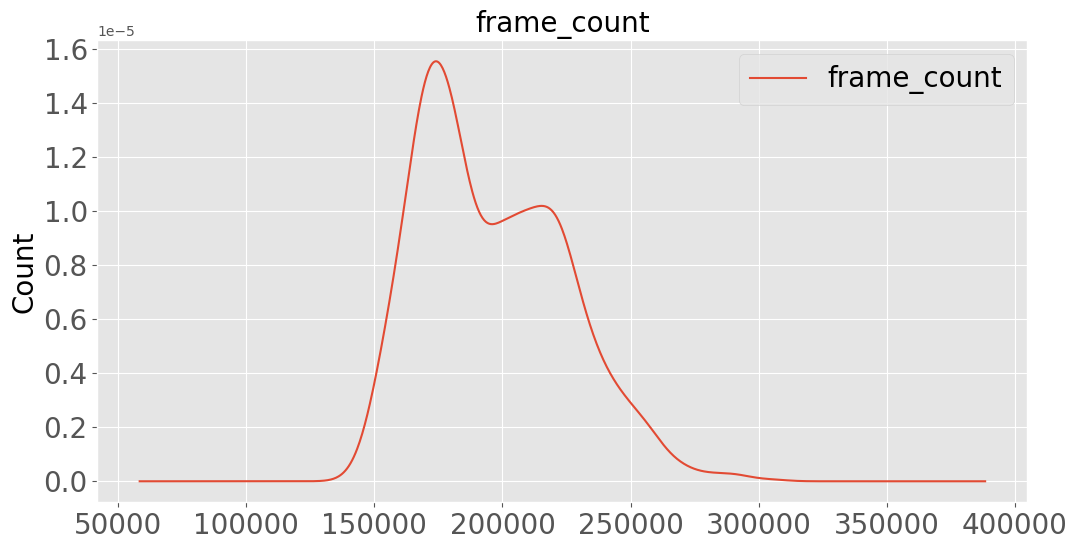

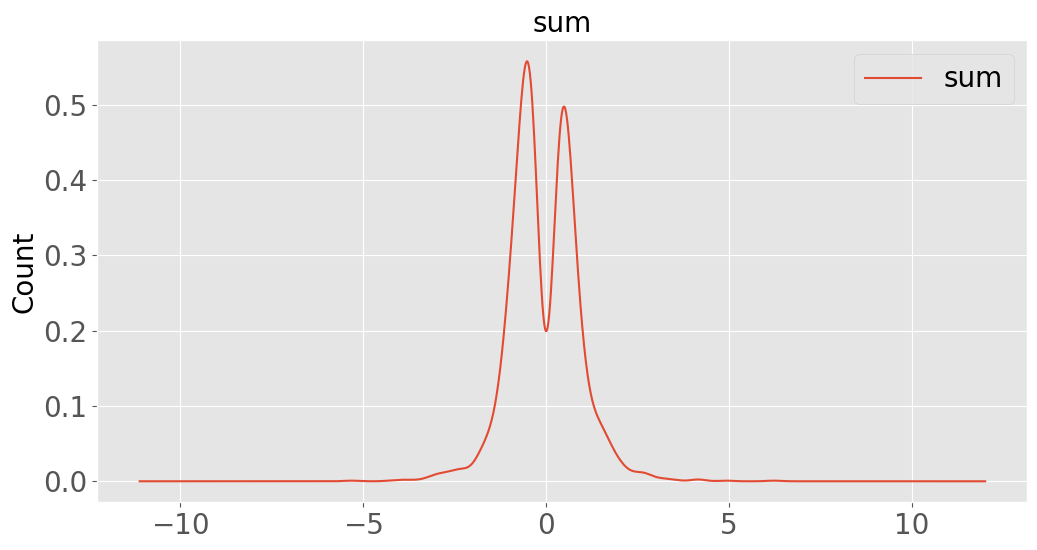

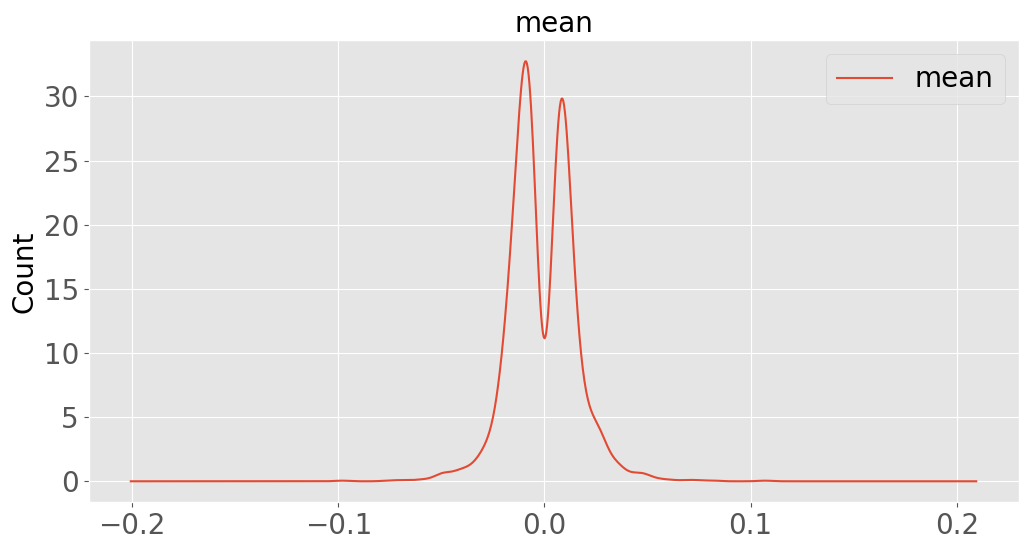

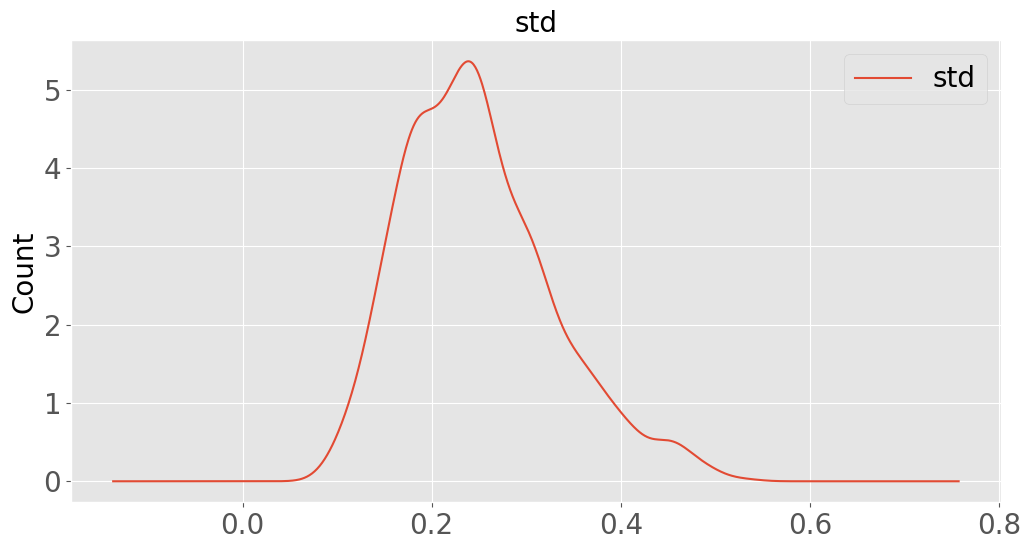

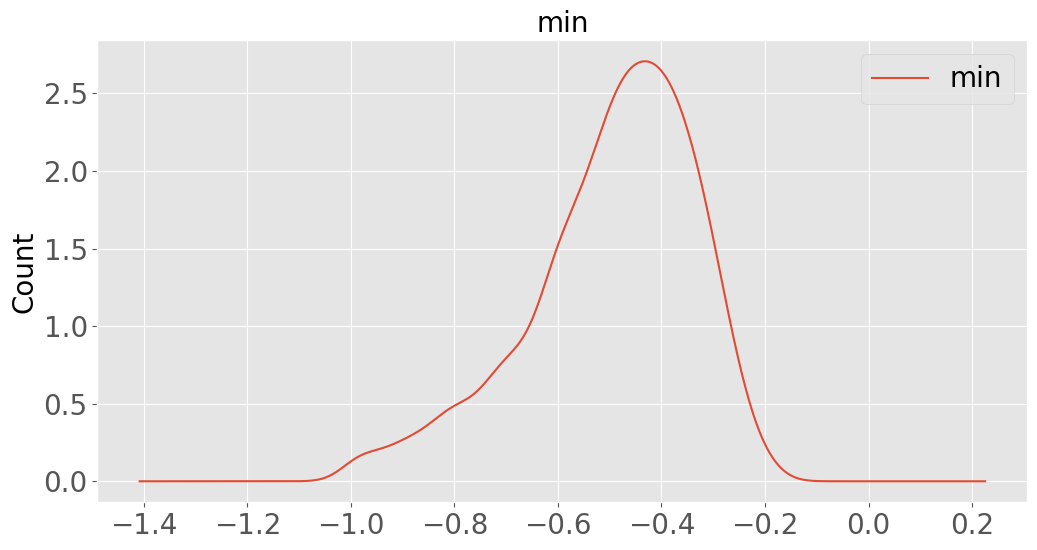

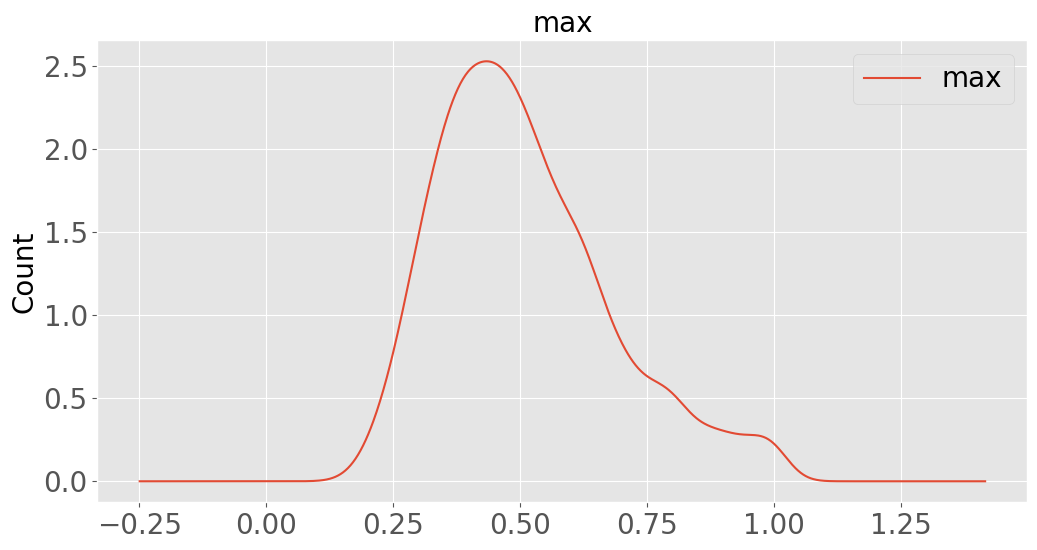

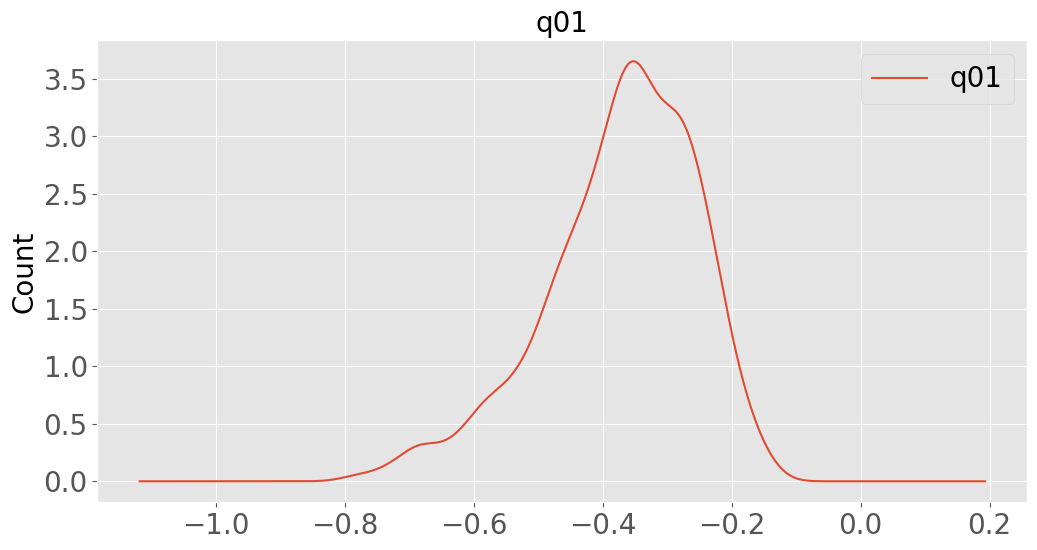

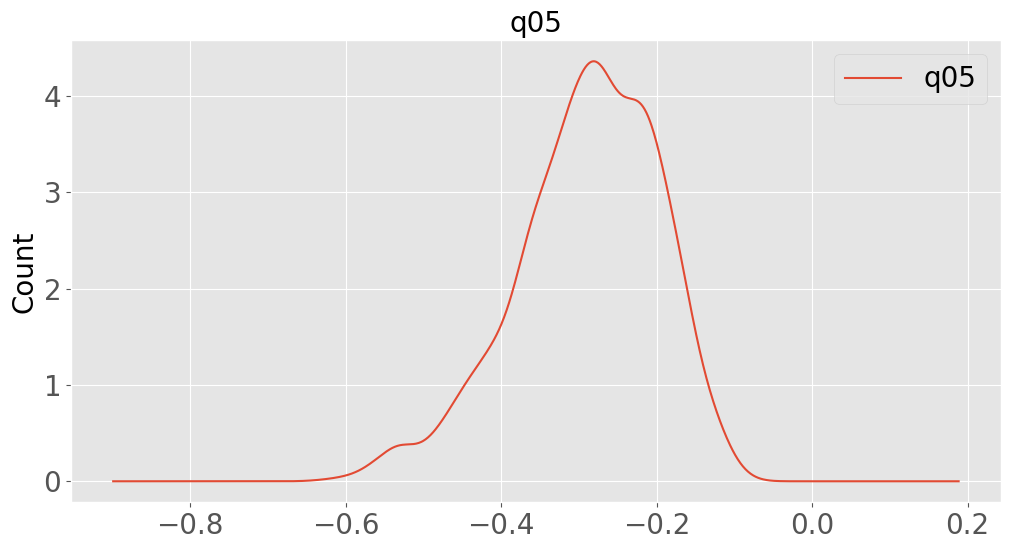

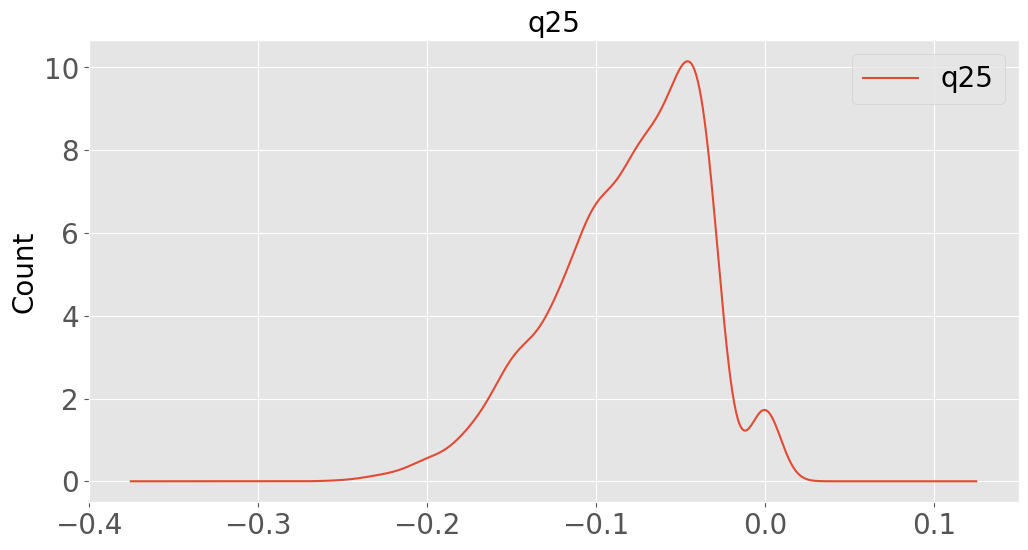

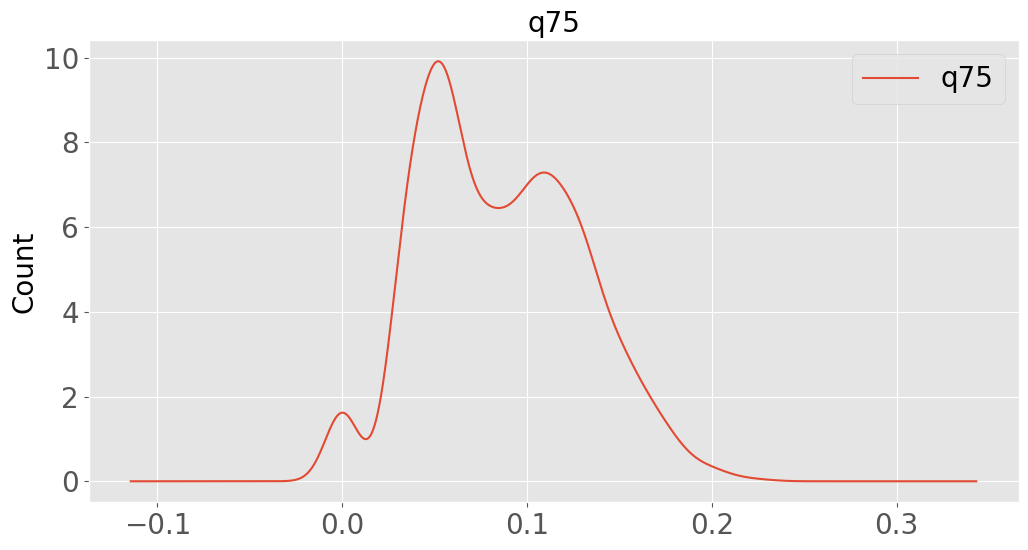

In [377]:
#distribution of the continuous features
for i in cont_vars[:10]:
    df_clean[i].plot.kde()
    plt.legend(fontsize = 20)
    plt.title(i, fontsize = 20)
    plt.xlabel('',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()  

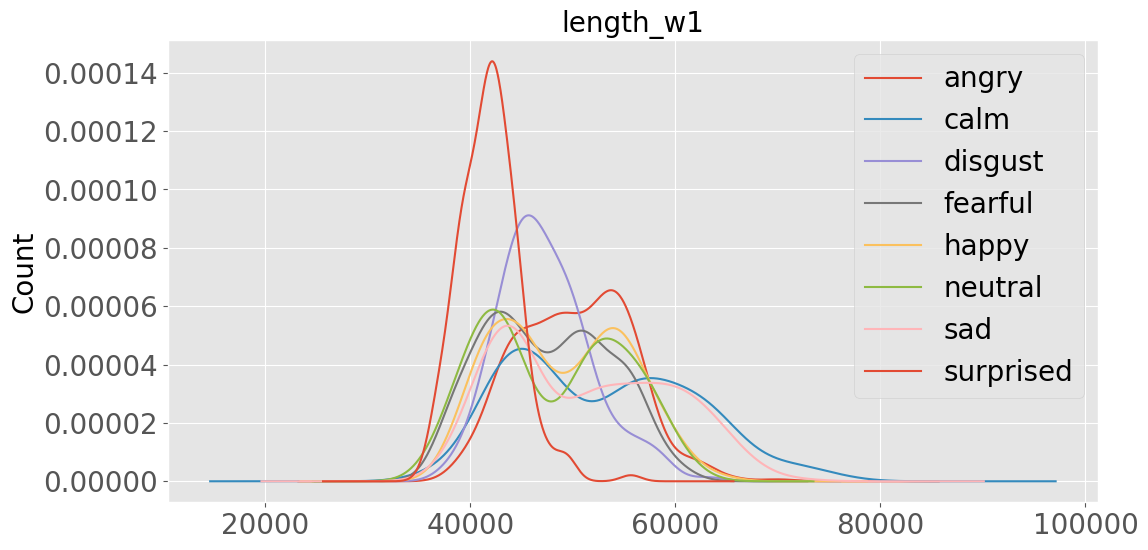

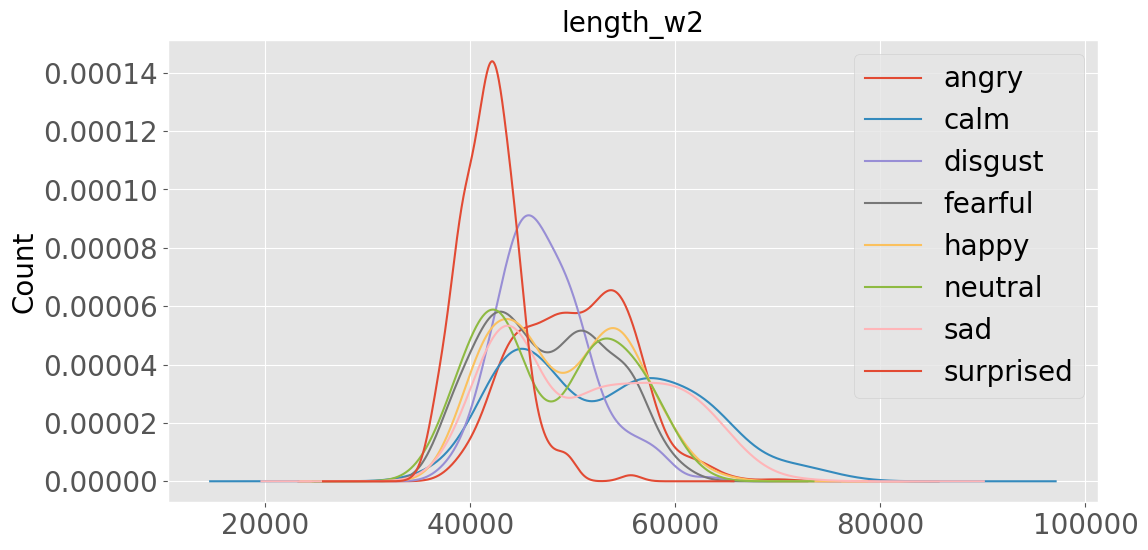

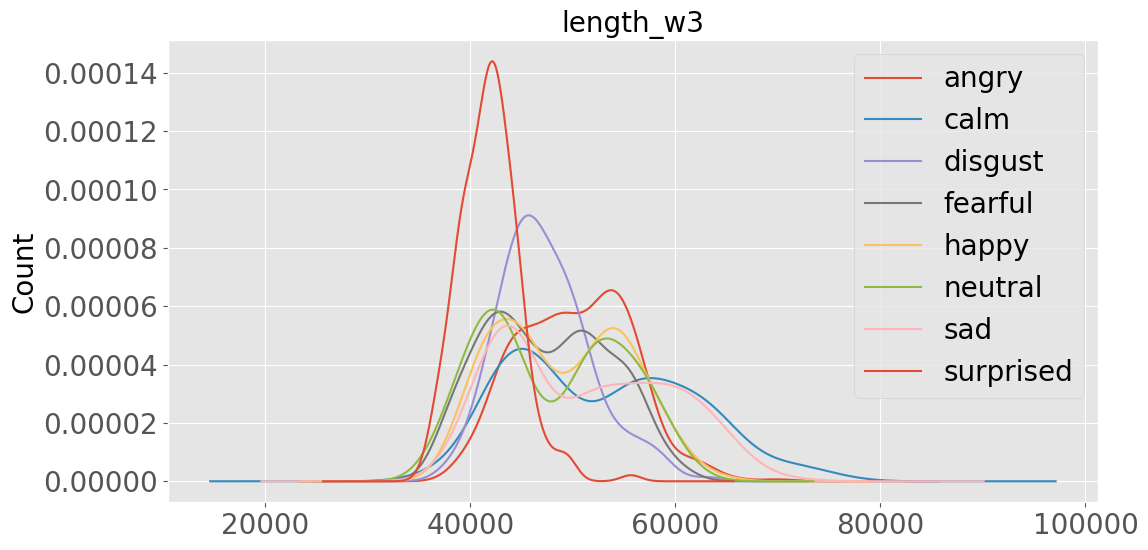

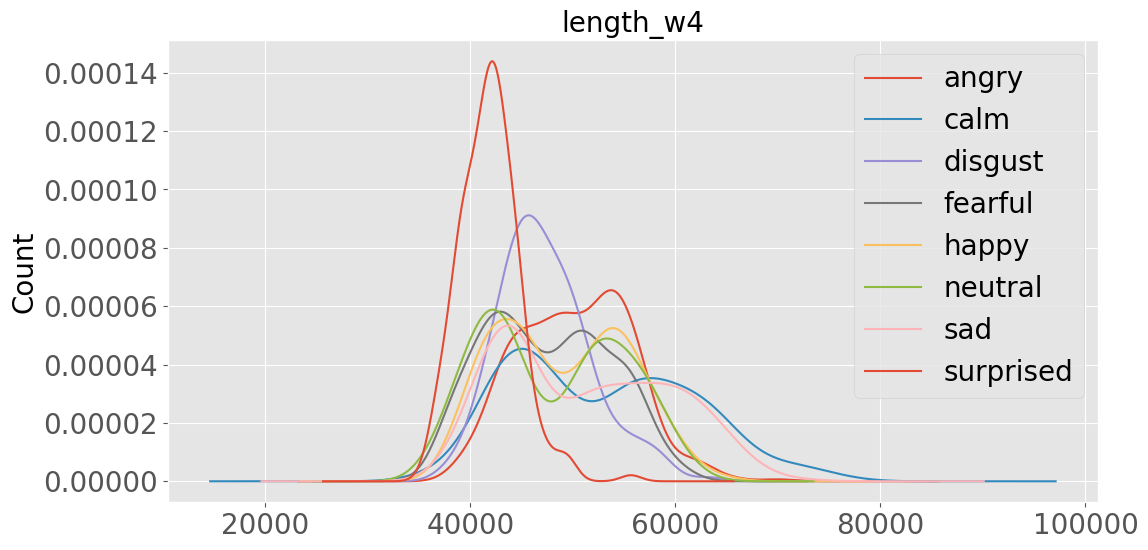

In [378]:
#distribution of length grouped by emotions
for i in ['length_w1','length_w2','length_w3','length_w4']:
    df_clean.groupby(['emotion'])[i].plot.kde()
    plt.legend(fontsize = 20)
    plt.title(i, fontsize = 20)
    plt.xlabel('',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()  


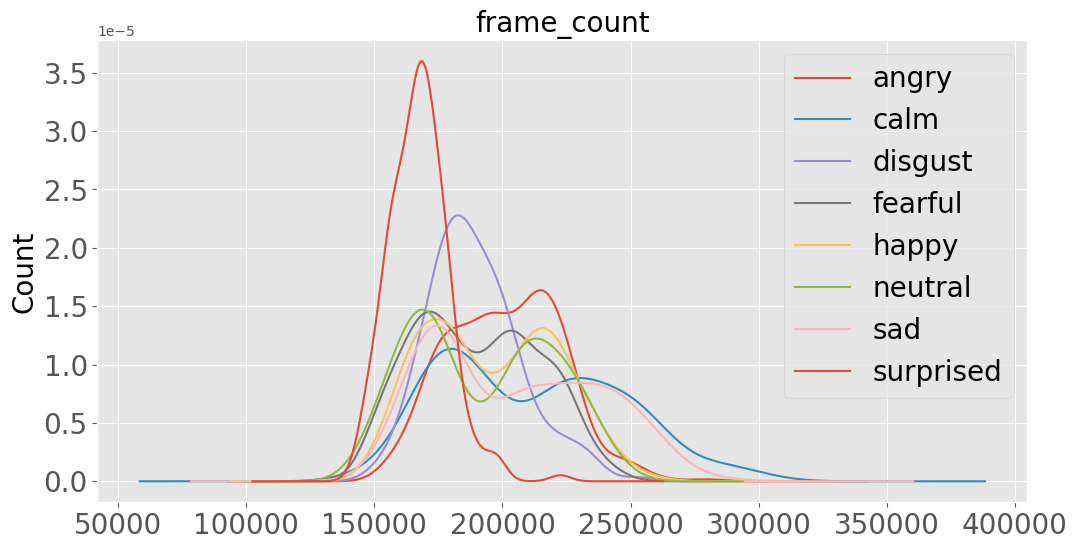

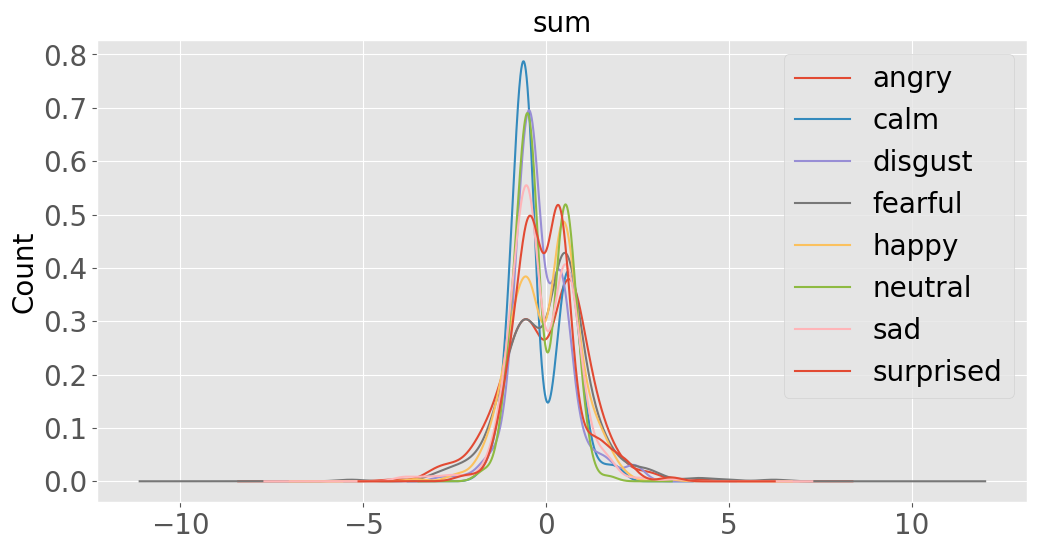

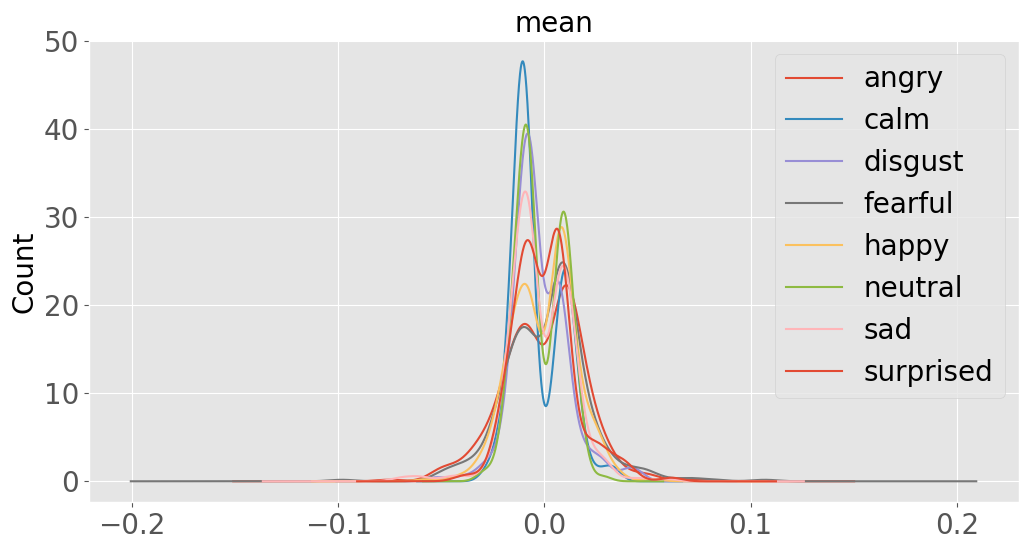

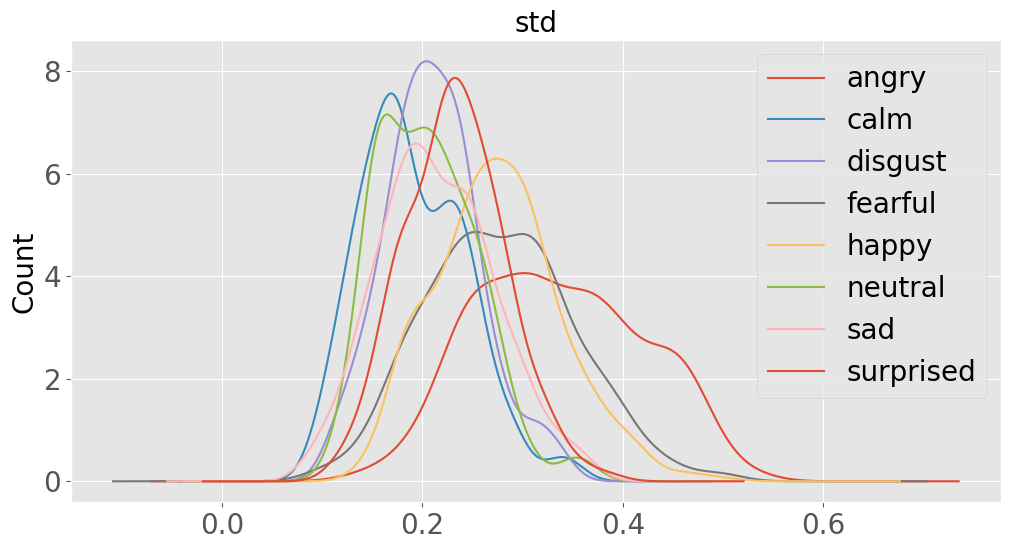

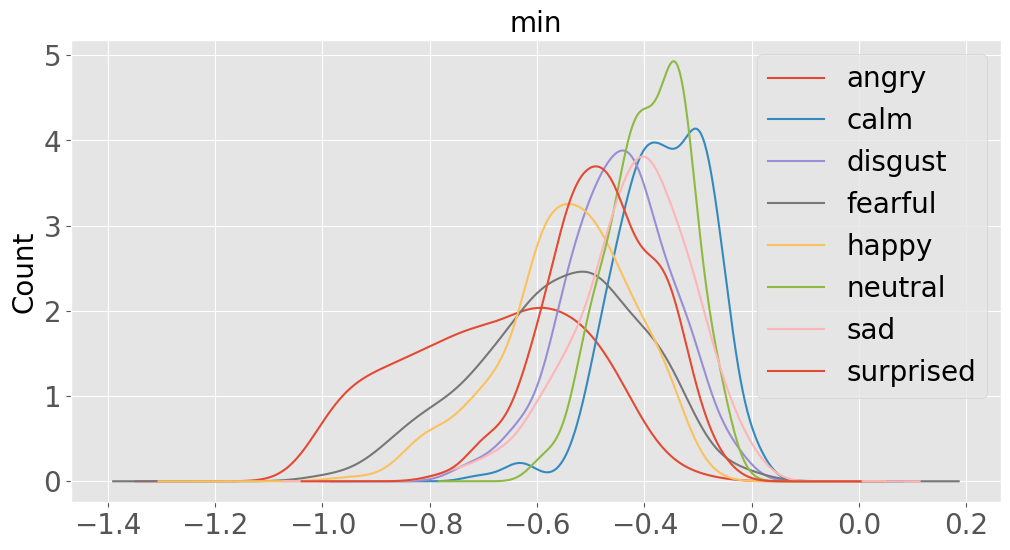

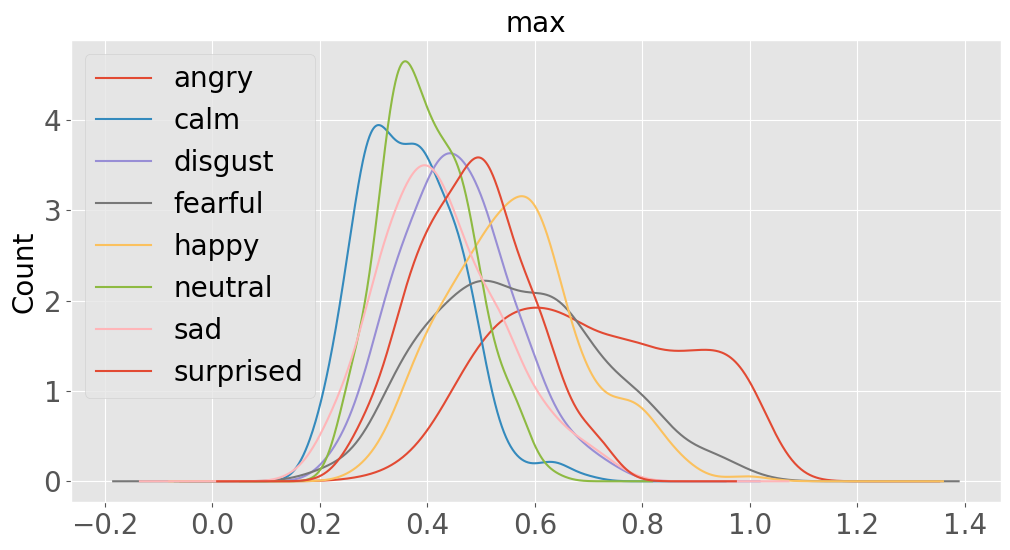

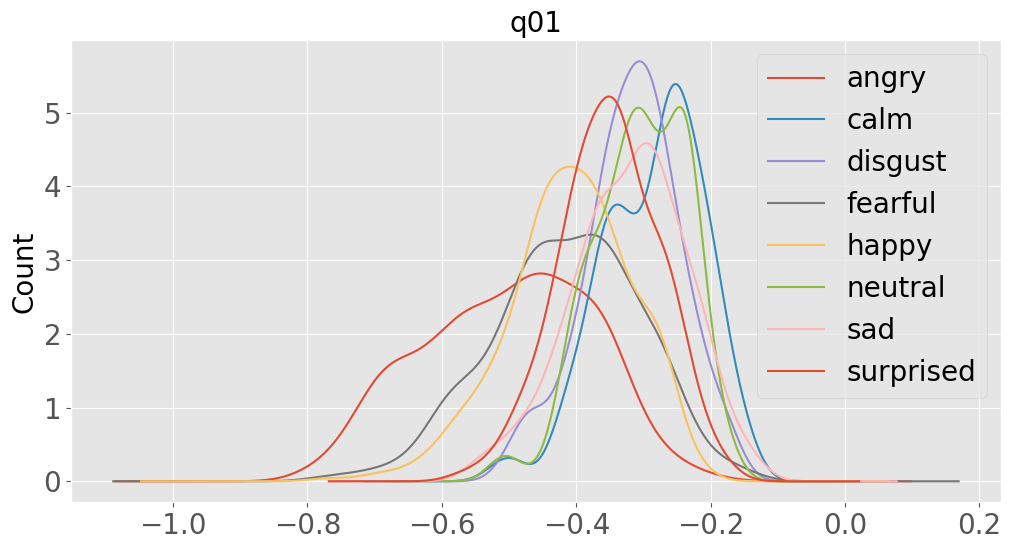

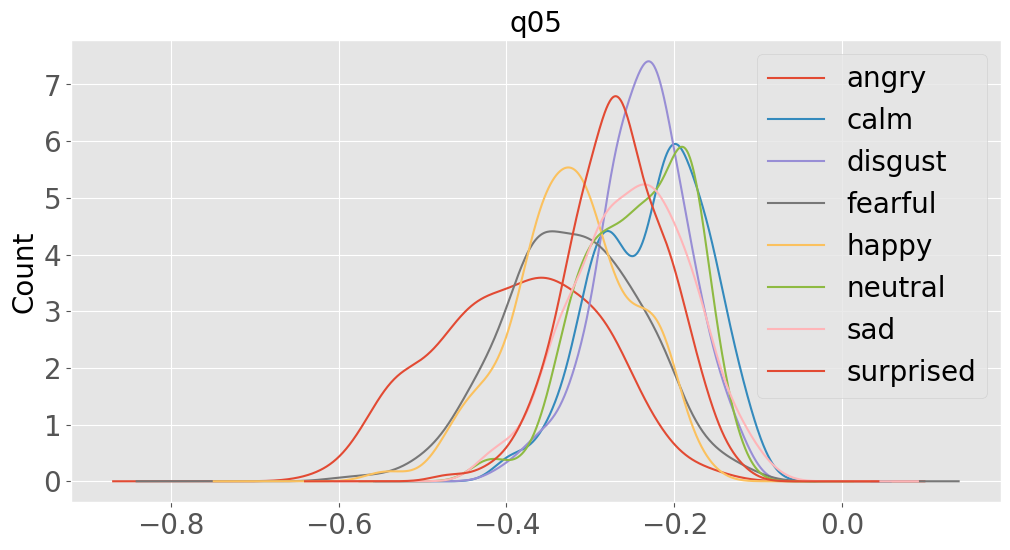

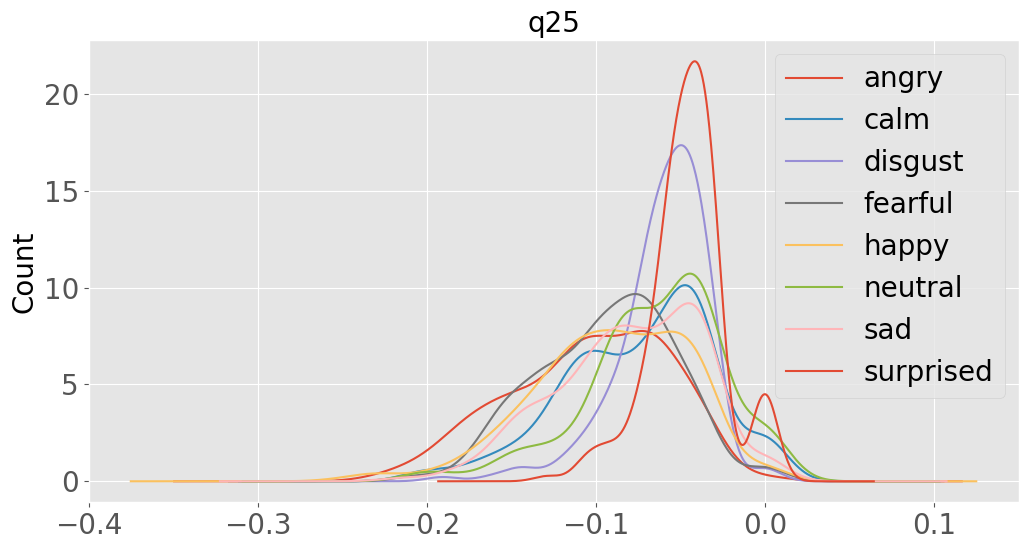

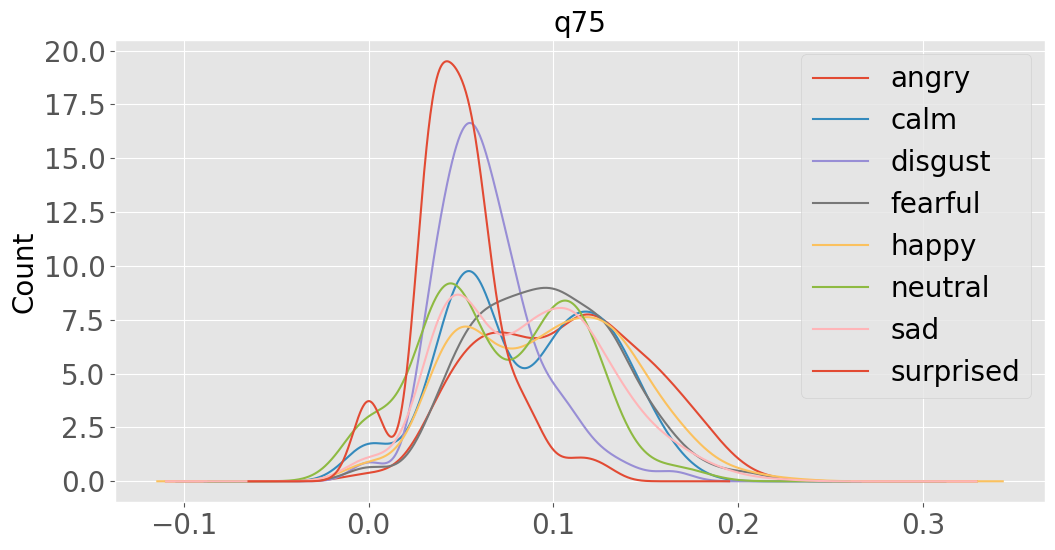

In [379]:
#distribution of the continuous features grouped by emotions
for i in cont_vars[:10]:
    df_clean.groupby(['emotion'])[i].plot.kde()
    plt.legend(fontsize = 20)
    plt.title(i, fontsize = 20)
    plt.xlabel('',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()  

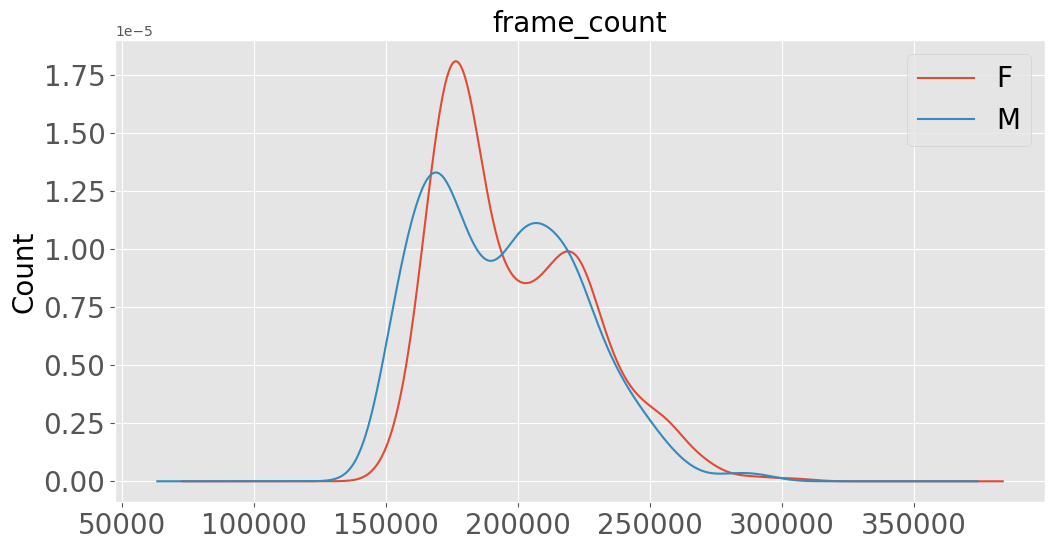

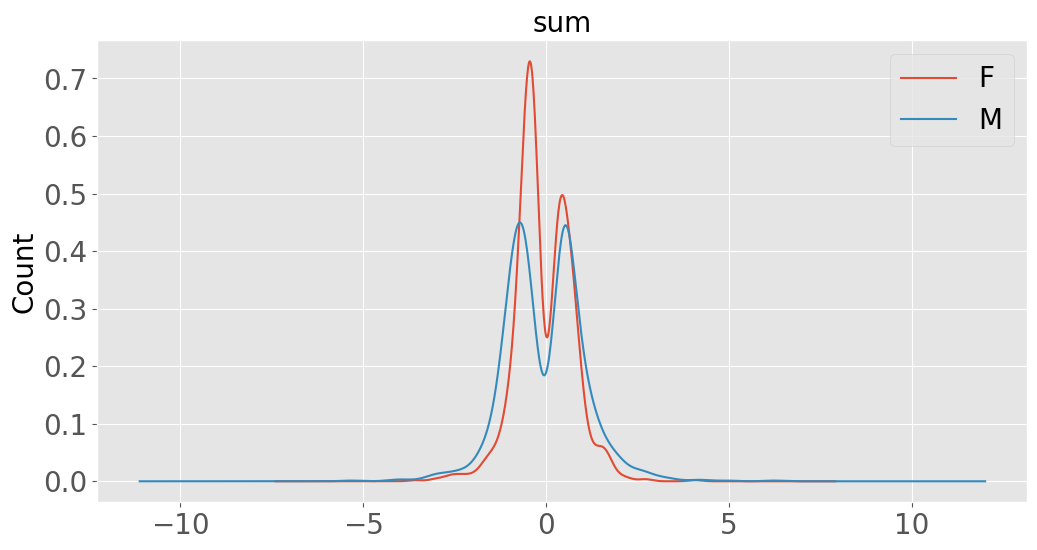

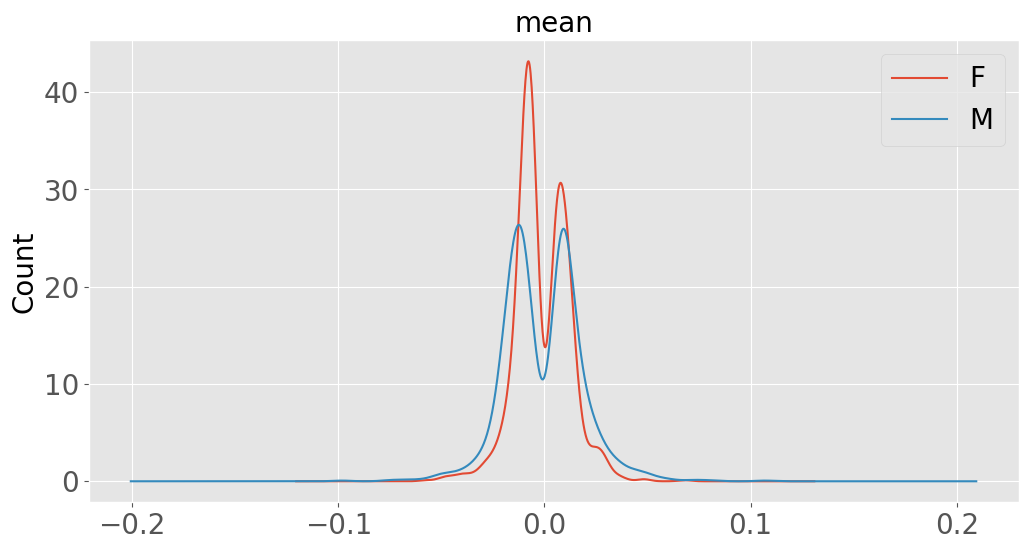

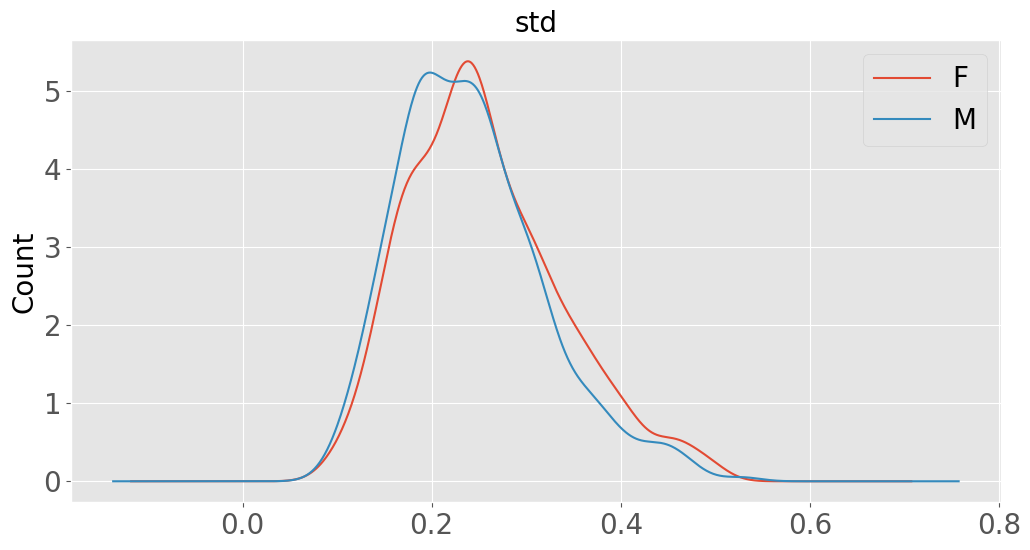

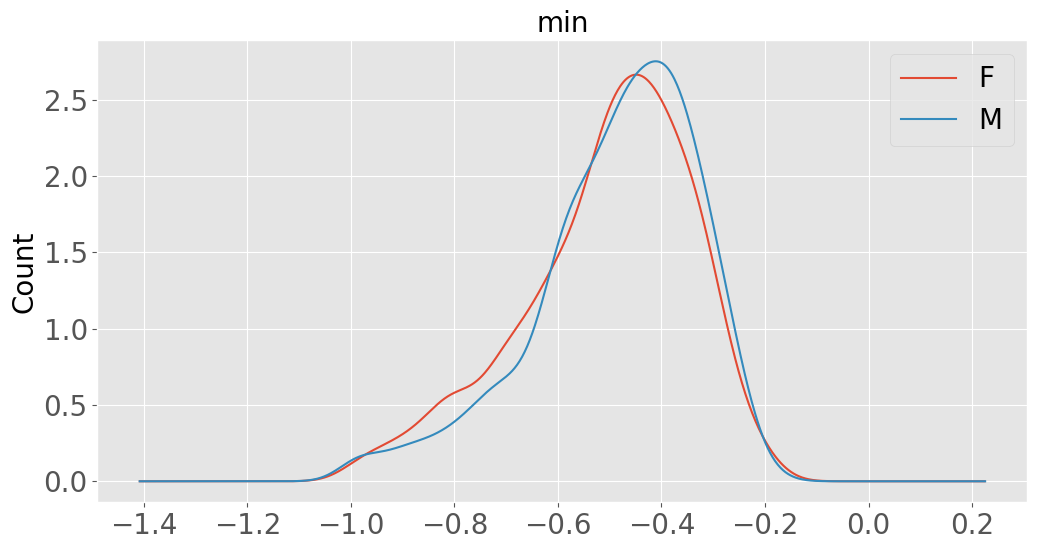

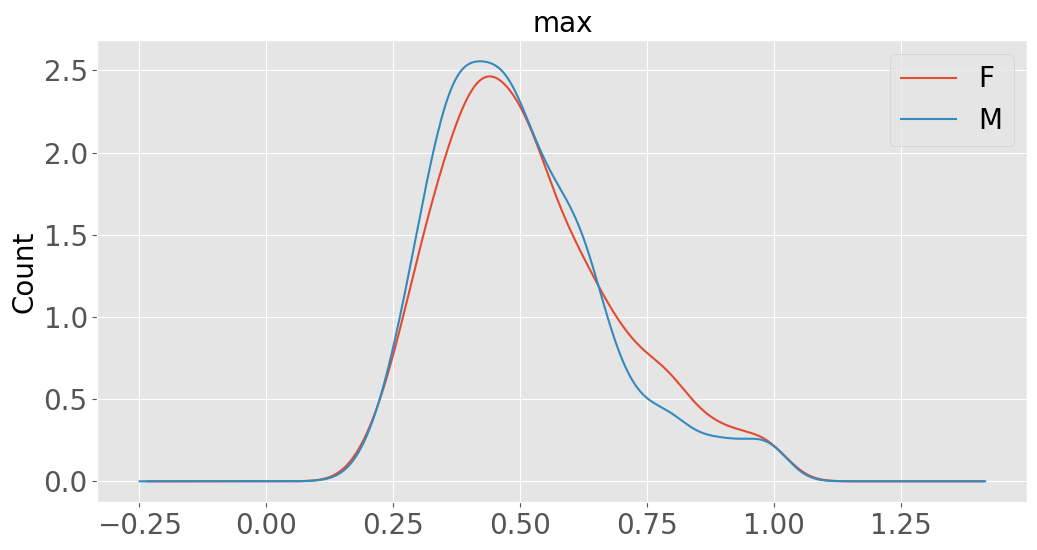

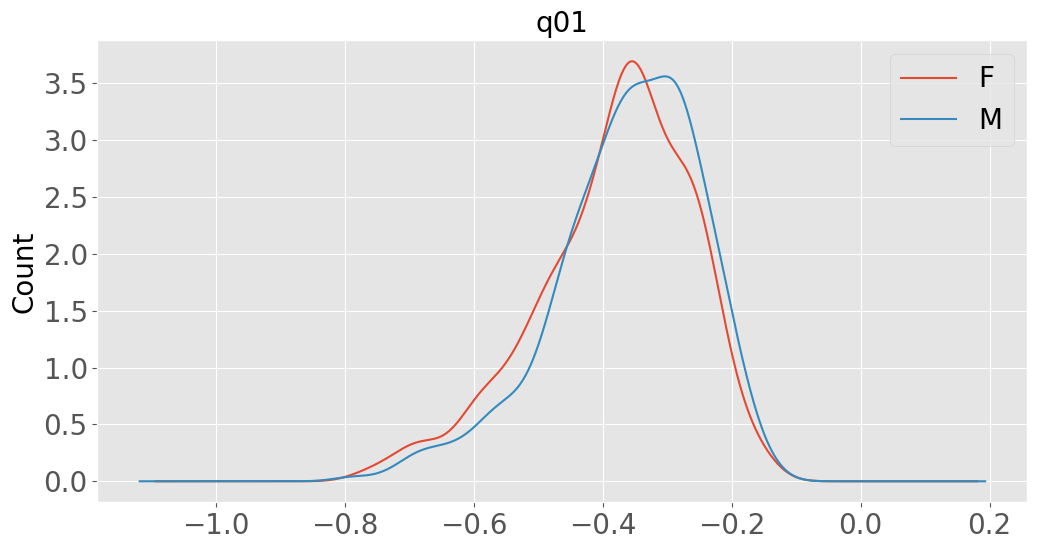

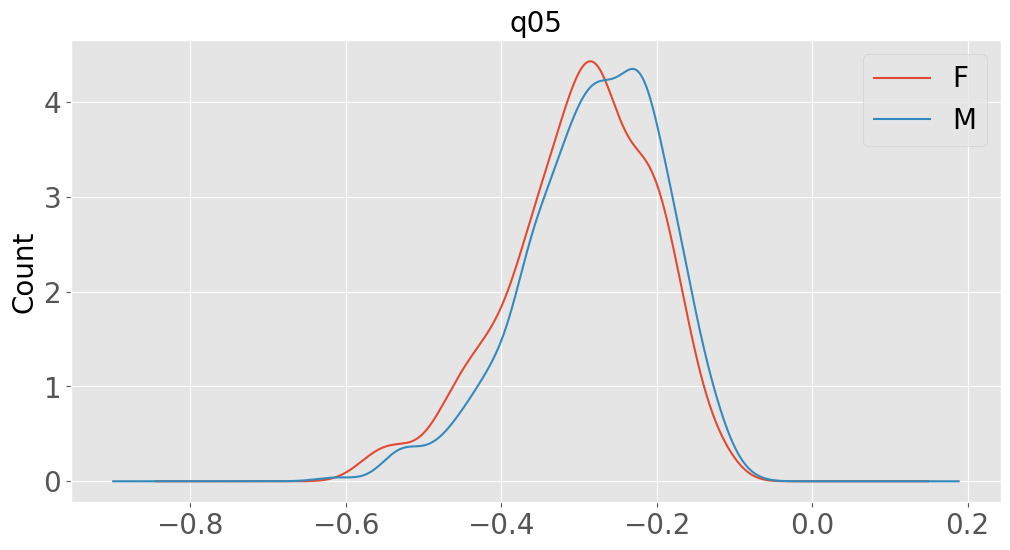

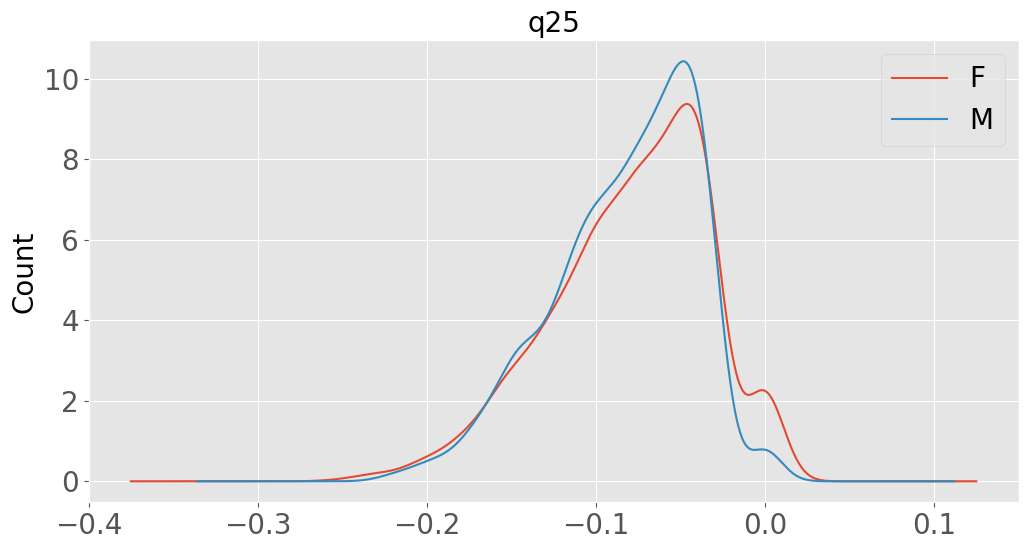

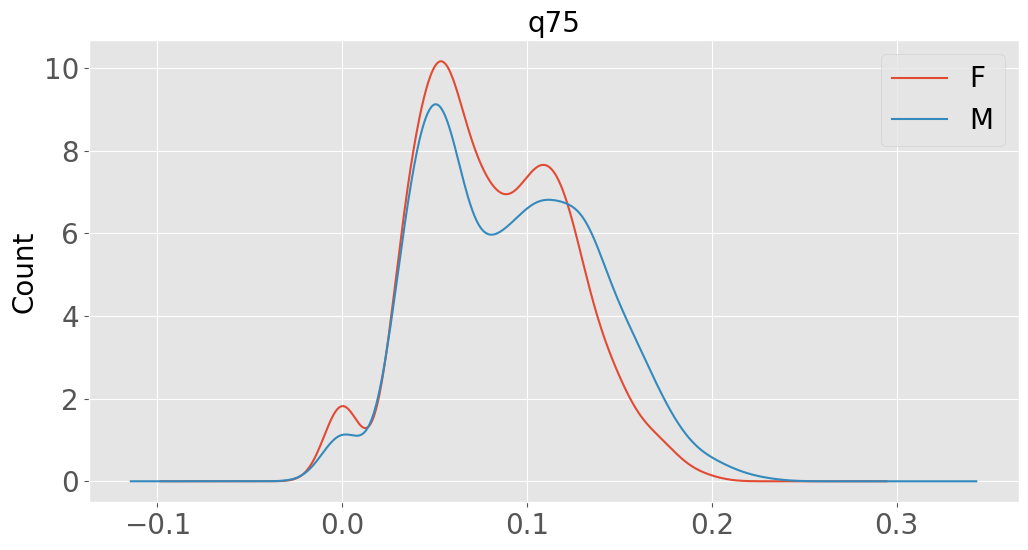

In [380]:
#distribution of the continuous features grouped by sex
for i in cont_vars[:10]:
    df_clean.groupby(['sex'])[i].plot.kde()
    plt.legend(fontsize = 20)
    plt.title(i, fontsize = 20)
    plt.xlabel('',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()  

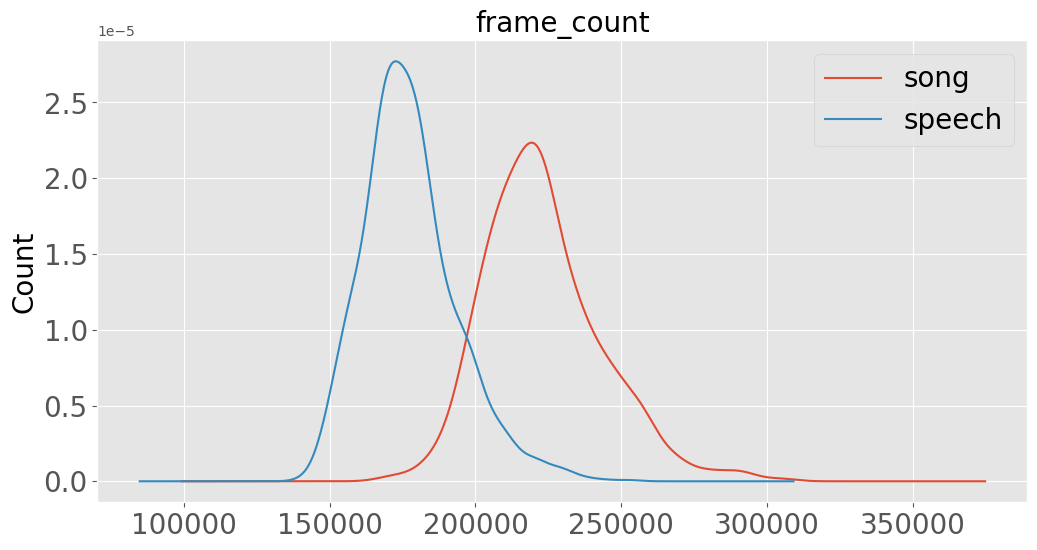

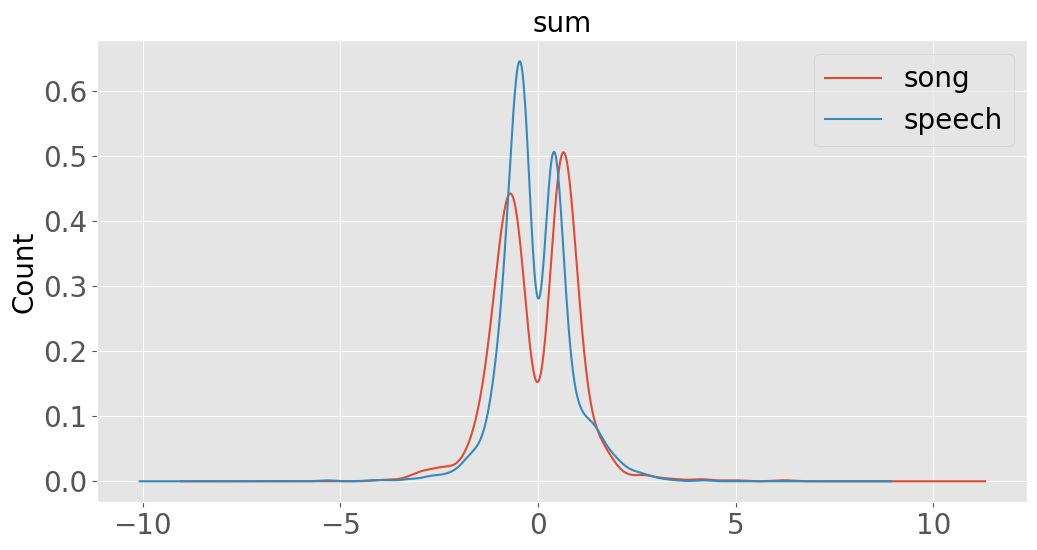

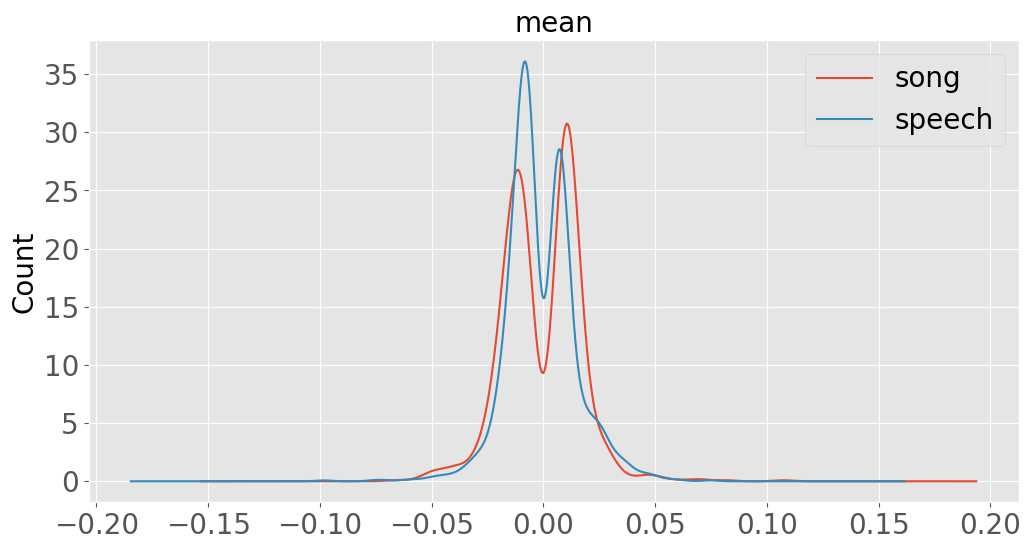

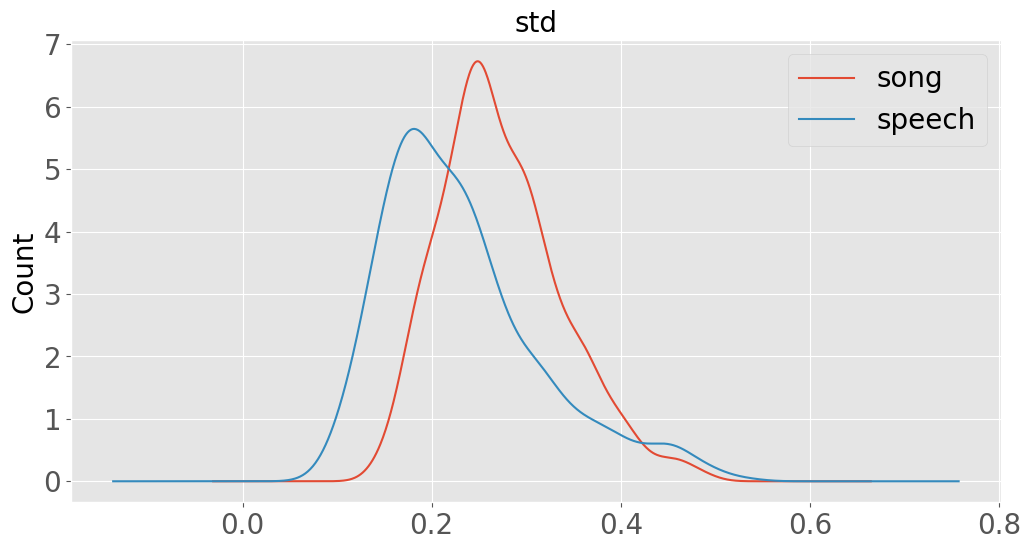

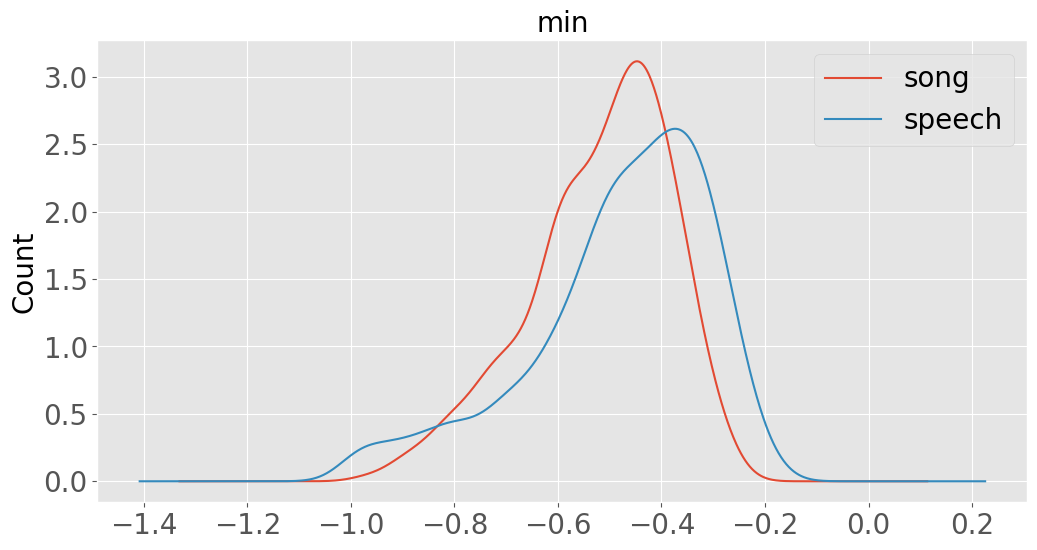

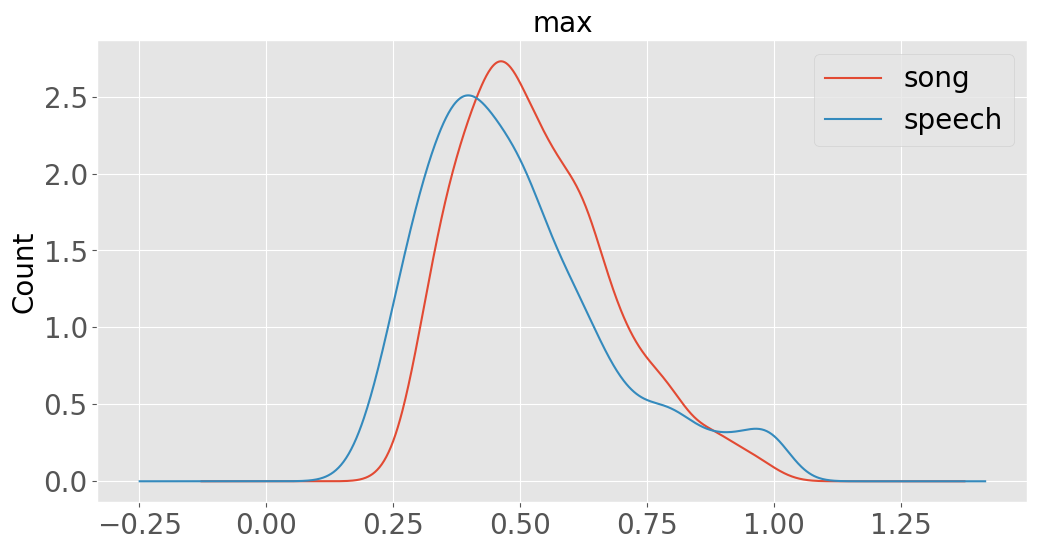

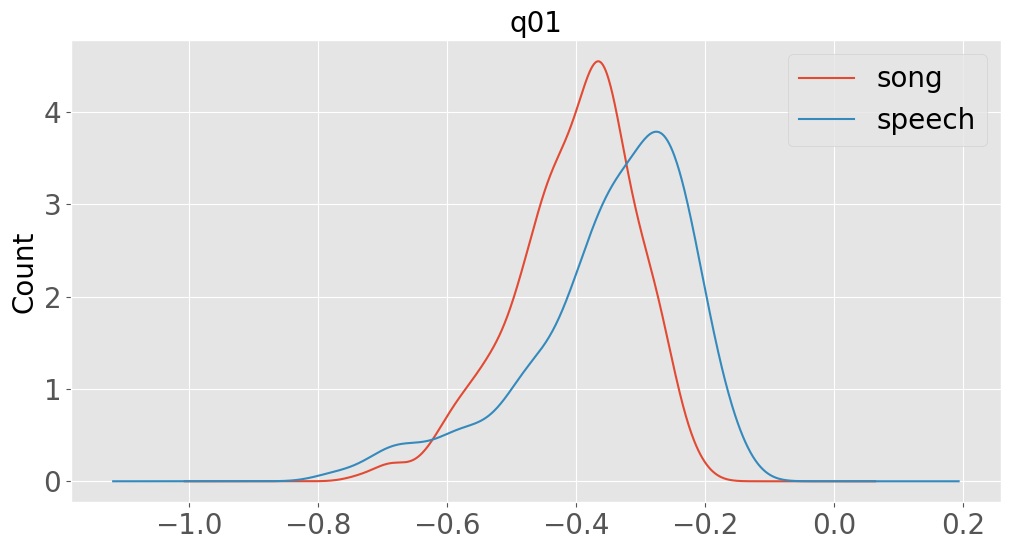

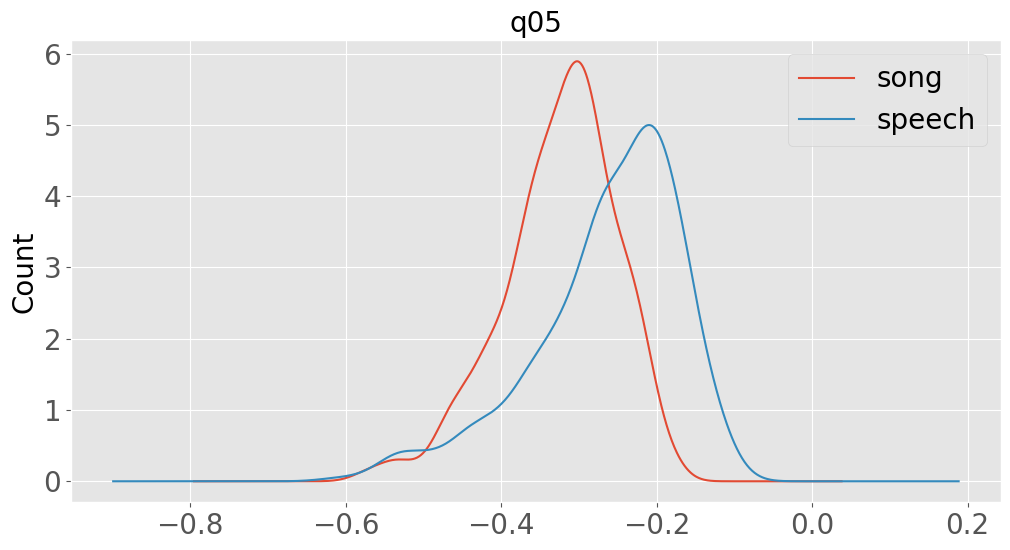

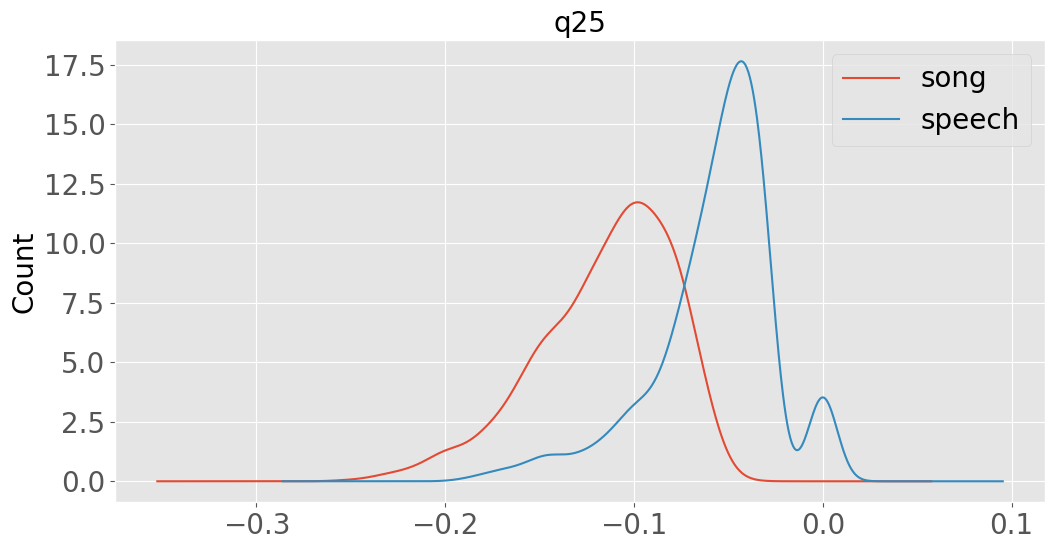

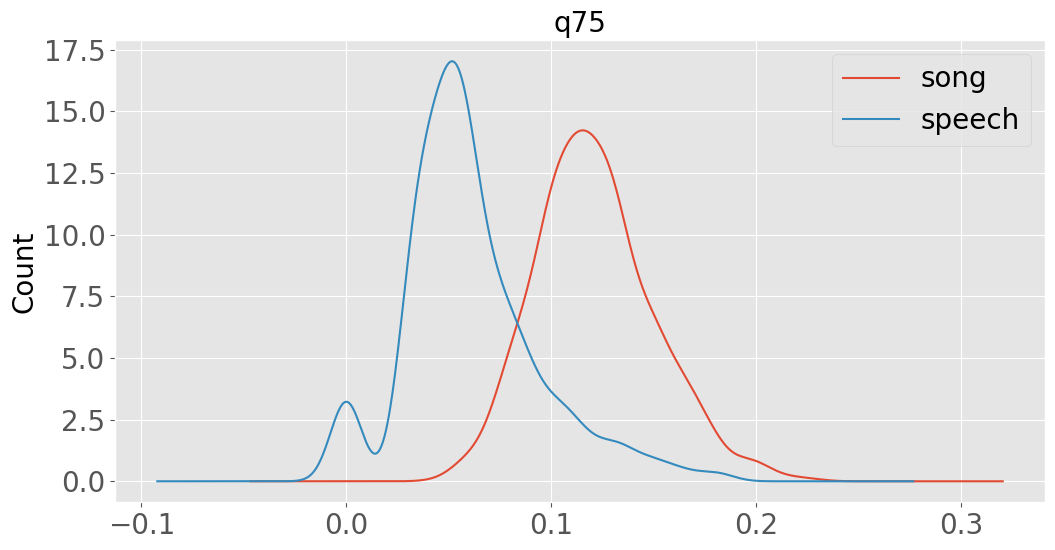

In [381]:
#distribution of the continuous features grouped by vocal_channel
for i in cont_vars[:10]:
    df_clean.groupby(['vocal_channel'])[i].plot.kde()
    plt.legend(fontsize = 20)
    plt.title(i, fontsize = 20)
    plt.xlabel('',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()  

#### Categorical features

Relative frequencies by feature

In [382]:
#categorical variables' descriptive statistics
for var in cat_vars:
    print(f'{var}:\nclasses relative frequencies:\n{df_clean[var].value_counts()/(len(df_clean))}')
    print('____________')

vocal_channel:
classes relative frequencies:
speech    0.587276
song      0.412724
Name: vocal_channel, dtype: float64
____________
emotion:
classes relative frequencies:
calm         0.153344
happy        0.153344
sad          0.153344
angry        0.153344
fearful      0.153344
disgust      0.078303
surprised    0.078303
neutral      0.076672
Name: emotion, dtype: float64
____________
emotional_intensity:
classes relative frequencies:
normal    0.538336
strong    0.461664
Name: emotional_intensity, dtype: float64
____________
statement:
classes relative frequencies:
Kids are talking by the door    0.5
Dogs are sitting by the door    0.5
Name: statement, dtype: float64
____________
repetition:
classes relative frequencies:
1st    0.5
2nd    0.5
Name: repetition, dtype: float64
____________
sex:
classes relative frequencies:
M    0.508972
F    0.491028
Name: sex, dtype: float64
____________


Distributions

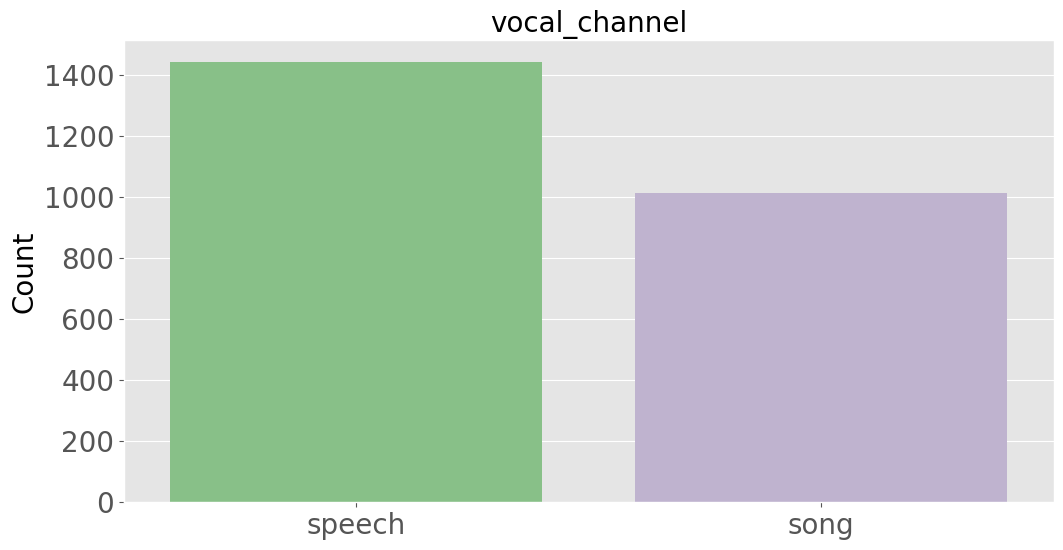

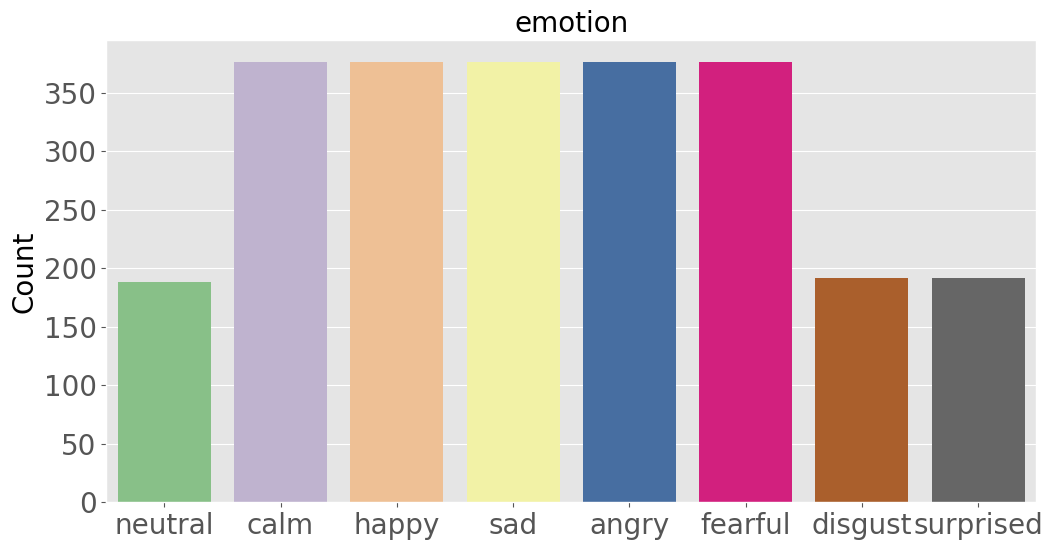

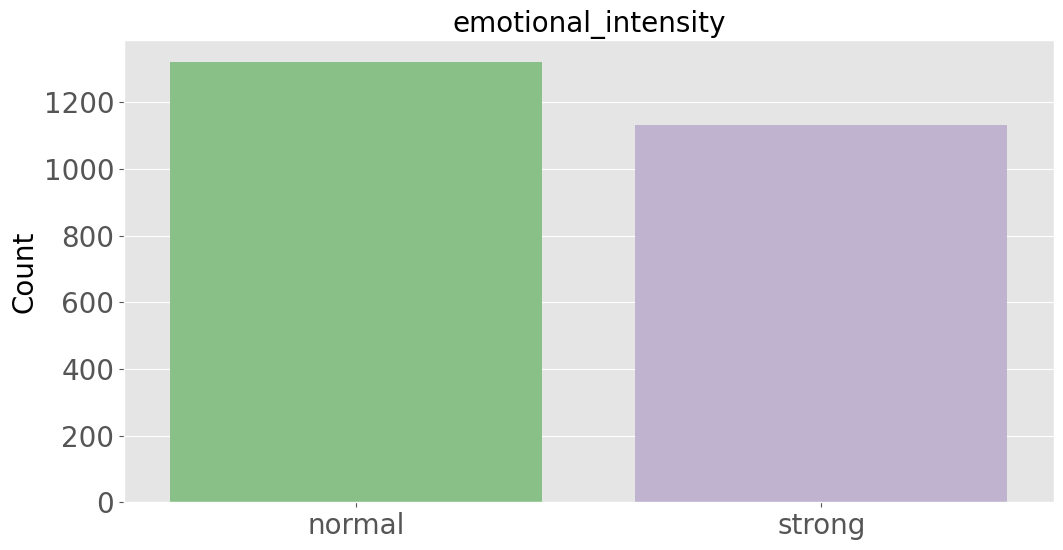

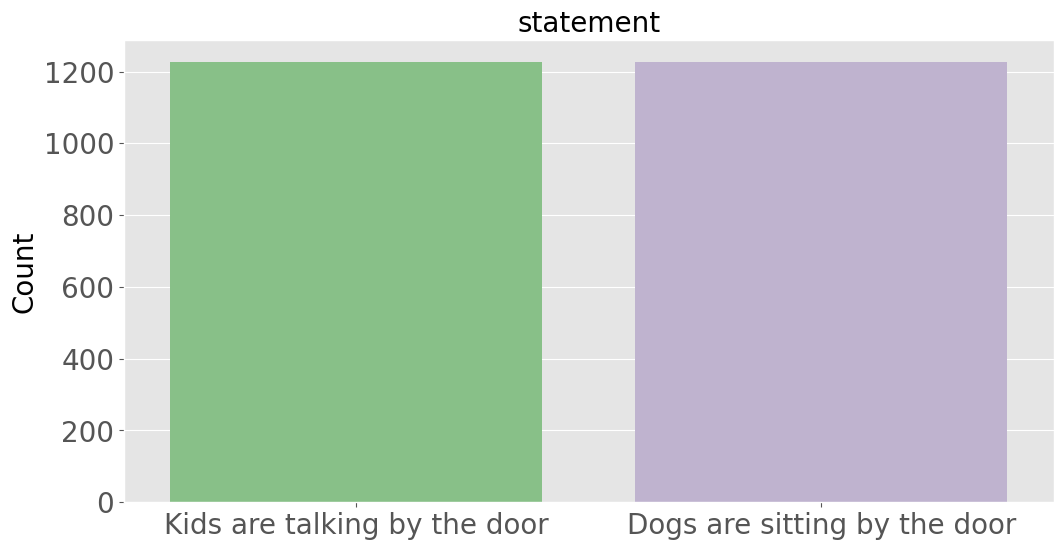

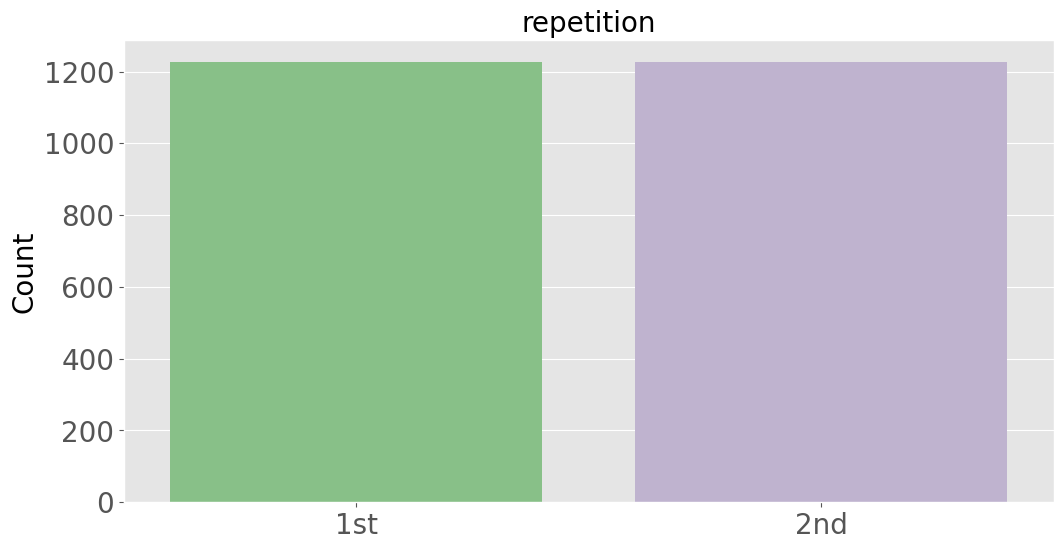

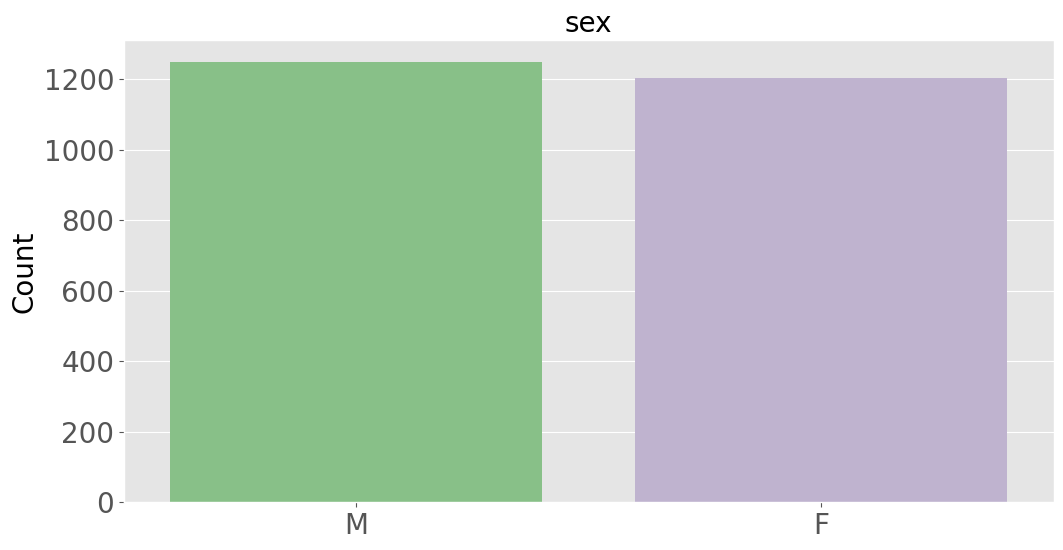

In [383]:

for i in cat_vars:
    sns.countplot(x=i, data=df_clean, palette='Accent')
    plt.title(i, fontsize = 20)
    plt.xlabel('',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()  

### Correlation Analysis

#### Pearson's Correlation on df_clean

In [384]:
corr=df_clean.corr(method="pearson").abs()
##corr = np.tril(corr.values, k=-1)
##np.fill_diagonal(corr.values, np.nan)
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) ##take upper triangle element
p_highcorr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] ##
print()
print(p_highcorr)
len(p_highcorr) 


['mean', 'min', 'max', 'q01', 'q05', 'q75', 'q95', 'q99', 'lag1_std', 'lag1_min', 'lag1_max', 'lag1_q01', 'lag1_q05', 'lag1_q25', 'lag1_q75', 'lag1_q95', 'lag1_q99', 'zc_std', 'zc_kur', 'zc_skew', 'mfcc_std', 'mfcc_min', 'mfcc_q01', 'stft_q01', 'stft_q25', 'stft_q50', 'stft_q75', 'stft_skew', 'length_w1', 'mean_w1', 'min_w1', 'max_w1', 'q01_w1', 'q75_w1', 'q95_w1', 'q99_w1', 'lag1_mean_w1', 'lag1_std_w1', 'lag1_min_w1', 'lag1_max_w1', 'lag1_q01_w1', 'lag1_q05_w1', 'lag1_q75_w1', 'lag1_q95_w1', 'lag1_q99_w1', 'zc_mean_w1', 'zc_std_w1', 'zc_skew_w1', 'mfcc_q01_w1', 'mfcc_skew_w1', 'sc_mean_w1', 'sc_q01_w1', 'sc_q05_w1', 'sc_q50_w1', 'sc_q99_w1', 'stft_mean_w1', 'stft_q01_w1', 'stft_q05_w1', 'stft_q75_w1', 'length_w2', 'mean_w2', 'std_w2', 'min_w2', 'max_w2', 'q01_w2', 'q05_w2', 'q25_w2', 'q75_w2', 'q95_w2', 'q99_w2', 'lag1_mean_w2', 'lag1_std_w2', 'lag1_min_w2', 'lag1_max_w2', 'lag1_q01_w2', 'lag1_q05_w2', 'lag1_q25_w2', 'lag1_q75_w2', 'lag1_q95_w2', 'lag1_q99_w2', 'lag1_kur_w2', 'zc_me

C:\Users\marco\AppData\Local\Temp\ipykernel_8360\966171446.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) ##take upper triangle element


180

#### Spearman's Ranking Correlation on df_clean

In [385]:
corr=df_clean.corr(method="spearman").abs()
##corr = np.tril(corr.values, k=-1)
##np.fill_diagonal(corr.values, np.nan)
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) ##take upper triangle element
s_highcorr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] ##
print()
print(s_highcorr)
len(s_highcorr)


['mean', 'min', 'max', 'q01', 'q05', 'q75', 'q95', 'q99', 'lag1_mean', 'lag1_std', 'lag1_min', 'lag1_max', 'lag1_q01', 'lag1_q05', 'lag1_q25', 'lag1_q75', 'lag1_q95', 'lag1_q99', 'zc_std', 'zc_kur', 'zc_skew', 'mfcc_std', 'mfcc_min', 'mfcc_q01', 'stft_q01', 'stft_q25', 'stft_q50', 'stft_q75', 'stft_skew', 'length_w1', 'mean_w1', 'min_w1', 'max_w1', 'q01_w1', 'q75_w1', 'q95_w1', 'q99_w1', 'lag1_mean_w1', 'lag1_std_w1', 'lag1_min_w1', 'lag1_max_w1', 'lag1_q01_w1', 'lag1_q05_w1', 'lag1_q75_w1', 'lag1_q95_w1', 'lag1_q99_w1', 'zc_mean_w1', 'zc_std_w1', 'zc_kur_w1', 'zc_skew_w1', 'mfcc_min_w1', 'mfcc_q01_w1', 'mfcc_skew_w1', 'sc_max_w1', 'sc_q01_w1', 'sc_q05_w1', 'sc_q25_w1', 'sc_q50_w1', 'sc_q99_w1', 'stft_min_w1', 'stft_q01_w1', 'stft_q05_w1', 'stft_q25_w1', 'stft_q50_w1', 'stft_q75_w1', 'stft_skew_w1', 'length_w2', 'mean_w2', 'std_w2', 'min_w2', 'max_w2', 'q01_w2', 'q05_w2', 'q25_w2', 'q75_w2', 'q95_w2', 'q99_w2', 'lag1_mean_w2', 'lag1_std_w2', 'lag1_min_w2', 'lag1_max_w2', 'lag1_q01_w2'

C:\Users\marco\AppData\Local\Temp\ipykernel_8360\842293396.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) ##take upper triangle element


193

#### df_clean2 without correlated features (Pearson)

In [386]:
#dropping highly correlated (Pearson)
df_clean2 = df_clean.drop(columns=p_highcorr, axis=1)
print(df_clean2.shape)
df_clean2.head()

(2452, 194)


vocal_channel  emotion emotional_intensity                     statement  \
0        speech  neutral              normal  Kids are talking by the door   
1        speech  neutral              normal  Kids are talking by the door   
2        speech  neutral              normal  Dogs are sitting by the door   
3        speech  neutral              normal  Dogs are sitting by the door   
4        speech     calm              normal  Kids are talking by the door   

  repetition sex  frame_count       sum       std      q25       kur  \
0        1st   M       158558  0.525456  0.158749 -0.03125  2.467774   
1        2nd   M       160160  0.485332  0.162403 -0.03125  2.545226   
2        1st   M       156956  0.531286  0.171945  0.00000  2.573056   
3        2nd   M       152152  0.518777  0.169690 -0.03125  2.794569   
4        1st   M       169769  0.516346  0.143522 -0.03125  2.365479   

       skew  lag1_sum     lag1_mean  lag1_kur  lag1_skew  zc_sum   zc_mean  \
0  0.904033  0.000000  0.000000e+00  3.727413   0.873354    8015  0.050549   
1  1.001578  0.000000  0.000000e+00  3.479539   0.961120    8491  0.053016   
2  1.269509 -0.039373 -3.888704e-10  3.792072   0.685187    7384  0.047045   
3  1.799676 -0.031250 -2.005743e-10  3.756485   0.939291    8237  0.054137   
4  0.619367 -0.031250 -1.797605e-10  3.540310   0.698883    7839  0.046175   

   zc_q95   mfcc_sum  mfcc_mean    mfcc_max    mfcc_q05  mfcc_q25  mfcc_q50  \
0     1.0 -58.218880 -31.827303  236.703871 -103.279677 -2.440220  0.000000   
1     1.0 -58.182892 -31.463829  218.363733 -117.846572 -3.248759  0.000000   
2     0.0 -57.876336 -31.574371  229.029214  -74.911534 -2.454553  0.000000   
3     1.0 -56.892891 -30.897814  216.240664  -68.482247 -2.546799  0.410203   
4     0.0 -60.272164 -32.974809  230.432203  -83.403776 -3.493539  0.065517   

   mfcc_q75   mfcc_q95    mfcc_q99  mfcc_kur  mfcc_skew        sc_sum  \
0  4.410921  30.161469  168.757852  2.574988  -4.202406  2.299052e+06   
1  4.701189  31.279460  165.340459  2.582115  -4.219091  2.233434e+06   
2  3.973402  26.970543  175.846084  2.583748  -4.211975  2.222455e+06   
3  4.798085  28.344560  165.640911  2.585200  -4.229406  2.088670e+06   
4  4.701327  34.965457  167.973568  2.581577  -4.219539  2.323108e+06   

       sc_mean       sc_std       sc_min        sc_max       sc_q01  \
0  7416.297748  4428.027507     0.000000  14584.465980   902.565913   
1  7135.571471  4196.796439   850.770533  12081.525528  1094.581562   
2  7239.265648  4333.681828     0.000000  12170.914344   920.081735   
3  7008.958170  3975.417498  1001.254212  12108.222571  1075.486368   
4  6997.311811  4373.360791     0.000000  13533.883671   891.298213   

        sc_q05       sc_q25       sc_q50        sc_q75        sc_q95  \
0  1201.423033  2283.332142  9147.820660  11550.242513  12008.514338   
1  1200.340688  2289.056196  8052.808972  11328.504500  11961.238991   
2  1148.386778  1925.224848  9010.389010  11356.644237  11991.455017   
3  1297.984213  2191.110772  8415.361716  10679.493689  11950.568879   
4  1196.233228  2061.461918  7491.276199  11370.101908  12001.621624   

      sc_q99    sc_kur   sc_skew     stft_sum  stft_mean  stft_std  stft_min  \
0  23.037355 -1.176257 -0.303929  2355.100189   0.633091  0.280529  0.000000   
1  22.894307 -1.177263 -0.244758  2364.657245   0.629568  0.277748  0.207067   
2  22.953476 -1.177849 -0.338952  2284.022589   0.619984  0.279639  0.000000   
3  22.911567 -1.152049 -0.309340  2190.683159   0.612607  0.263994  0.318676   
4  22.950043 -1.191174 -0.160822  2423.241086   0.608243  0.293414  0.000000   

   stft_q05  stft_kur    sum_w1    std_w1   q05_w1  q25_w1  q50_w1     kur_w1  \
0  0.479163 -0.947927 -0.145050  0.045313  0.00000     0.0     0.0  19.832931   
1  0.488479 -0.950712  0.142591  0.027807  0.00000     0.0     0.0  14.742638   
2  0.469641 -0.951862  0.135765  0.022920 -0.03125     0.0     0.0   2.294686   
3  0.533729 -0.975724 -0.193117  0.023039  0.00000  

#### df_clean2 without correlated features (Pearson and Spearman)

In [387]:
#Spearman's correlation on df_clean2
corr=df_clean2.corr(method="spearman").abs()
##corr = np.tril(corr.values, k=-1)
##np.fill_diagonal(corr.values, np.nan)
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) ##take upper triangle element
s_highcorr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] ##
print()
print(s_highcorr)
len(s_highcorr)


['lag1_mean', 'zc_kur_w1', 'mfcc_min_w1', 'sc_max_w1', 'stft_min_w1', 'stft_q50_w1', 'stft_skew_w1', 'lag1_skew_w2', 'mfcc_skew_w2', 'stft_kur_w2', 'sc_skew_w3', 'stft_kur_w3', 'mean_w4', 'sc_q01_w4', 'stft_q50_w4', 'stft_q75_w4']


C:\Users\marco\AppData\Local\Temp\ipykernel_8360\1773644313.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) ##take upper triangle element


16

In [388]:
#dropping the remaining variables which have non-linear relationships
df_clean2 = df_clean2.drop(columns=s_highcorr, axis=1)
print(df_clean2.shape)
df_clean2.head()

(2452, 178)


vocal_channel  emotion emotional_intensity                     statement  \
0        speech  neutral              normal  Kids are talking by the door   
1        speech  neutral              normal  Kids are talking by the door   
2        speech  neutral              normal  Dogs are sitting by the door   
3        speech  neutral              normal  Dogs are sitting by the door   
4        speech     calm              normal  Kids are talking by the door   

  repetition sex  frame_count       sum       std      q25       kur  \
0        1st   M       158558  0.525456  0.158749 -0.03125  2.467774   
1        2nd   M       160160  0.485332  0.162403 -0.03125  2.545226   
2        1st   M       156956  0.531286  0.171945  0.00000  2.573056   
3        2nd   M       152152  0.518777  0.169690 -0.03125  2.794569   
4        1st   M       169769  0.516346  0.143522 -0.03125  2.365479   

       skew  lag1_sum  lag1_kur  lag1_skew  zc_sum   zc_mean  zc_q95  \
0  0.904033  0.000000  3.727413   0.873354    8015  0.050549     1.0   
1  1.001578  0.000000  3.479539   0.961120    8491  0.053016     1.0   
2  1.269509 -0.039373  3.792072   0.685187    7384  0.047045     0.0   
3  1.799676 -0.031250  3.756485   0.939291    8237  0.054137     1.0   
4  0.619367 -0.031250  3.540310   0.698883    7839  0.046175     0.0   

    mfcc_sum  mfcc_mean    mfcc_max    mfcc_q05  mfcc_q25  mfcc_q50  mfcc_q75  \
0 -58.218880 -31.827303  236.703871 -103.279677 -2.440220  0.000000  4.410921   
1 -58.182892 -31.463829  218.363733 -117.846572 -3.248759  0.000000  4.701189   
2 -57.876336 -31.574371  229.029214  -74.911534 -2.454553  0.000000  3.973402   
3 -56.892891 -30.897814  216.240664  -68.482247 -2.546799  0.410203  4.798085   
4 -60.272164 -32.974809  230.432203  -83.403776 -3.493539  0.065517  4.701327   

    mfcc_q95    mfcc_q99  mfcc_kur  mfcc_skew        sc_sum      sc_mean  \
0  30.161469  168.757852  2.574988  -4.202406  2.299052e+06  7416.297748   
1  31.279460  165.340459  2.582115  -4.219091  2.233434e+06  7135.571471   
2  26.970543  175.846084  2.583748  -4.211975  2.222455e+06  7239.265648   
3  28.344560  165.640911  2.585200  -4.229406  2.088670e+06  7008.958170   
4  34.965457  167.973568  2.581577  -4.219539  2.323108e+06  6997.311811   

        sc_std       sc_min        sc_max       sc_q01       sc_q05  \
0  4428.027507     0.000000  14584.465980   902.565913  1201.423033   
1  4196.796439   850.770533  12081.525528  1094.581562  1200.340688   
2  4333.681828     0.000000  12170.914344   920.081735  1148.386778   
3  3975.417498  1001.254212  12108.222571  1075.486368  1297.984213   
4  4373.360791     0.000000  13533.883671   891.298213  1196.233228   

        sc_q25       sc_q50        sc_q75        sc_q95     sc_q99    sc_kur  \
0  2283.332142  9147.820660  11550.242513  12008.514338  23.037355 -1.176257   
1  2289.056196  8052.808972  11328.504500  11961.238991  22.894307 -1.177263   
2  1925.224848  9010.389010  11356.644237  11991.455017  22.953476 -1.177849   
3  2191.110772  8415.361716  10679.493689  11950.568879  22.911567 -1.152049   
4  2061.461918  7491.276199  11370.101908  12001.621624  22.950043 -1.191174   

    sc_skew     stft_sum  stft_mean  stft_std  stft_min  stft_q05  stft_kur  \
0 -0.303929  2355.100189   0.633091  0.280529  0.000000  0.479163 -0.947927   
1 -0.244758  2364.657245   0.629568  0.277748  0.207067  0.488479 -0.950712   
2 -0.338952  2284.022589   0.619984  0.279639  0.000000  0.469641 -0.951862   
3 -0.309340  2190.683159   0.612607  0.263994  0.318676  0.533729 -0.975724   
4 -0.160822  2423.241086   0.608243  0.293414  0.000000  0.459990 -1.010152   

     sum_w1    std_w1   q05_w1  q25_w1  q50_w1     kur_w1   skew_w1  \
0 -0.145050  0.045313  0.00000     0.0     0.0  19.832931  2.213239   
1  0.142591  0.027807  0.00000     0.0     0.0  14.742638 -1.602687   
2  0.135765  0.022920 -0.03125     0.0     0.0   2.294686  0.201476   
3 -0.193117  0.023039  0.00000     0.0     0.0   2.56068

### Feature Selection (in 'featSel_and_testing.ipynb')

##### Module1: 
-apply different dimensionality reduction algorithms
    and test them against different possible classification methods

-imbalanced learning

-anomaly detection

#### Variance Threshold

In [389]:
# applying the variance threshold algorithm to remove the features that present low variance (they don't convey much information)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(df_clean2.shape)
df_clean2_sel = sel.fit_transform(df_clean2.iloc[::, 6:])
cols_idxs = sel.get_support(indices=True) + 6
df_clean2 = pd.concat([df_clean2.iloc[:,:6],df_clean2.iloc[:,cols_idxs]], axis=1)
print(df_clean2.shape)
df_clean2.head(5)

(2452, 178)
(2452, 123)


vocal_channel  emotion emotional_intensity                     statement  \
0        speech  neutral              normal  Kids are talking by the door   
1        speech  neutral              normal  Kids are talking by the door   
2        speech  neutral              normal  Dogs are sitting by the door   
3        speech  neutral              normal  Dogs are sitting by the door   
4        speech     calm              normal  Kids are talking by the door   

  repetition sex  frame_count       sum      skew  lag1_kur  zc_sum  \
0        1st   M       158558  0.525456  0.904033  3.727413    8015   
1        2nd   M       160160  0.485332  1.001578  3.479539    8491   
2        1st   M       156956  0.531286  1.269509  3.792072    7384   
3        2nd   M       152152  0.518777  1.799676  3.756485    8237   
4        1st   M       169769  0.516346  0.619367  3.540310    7839   

    mfcc_sum  mfcc_mean    mfcc_max    mfcc_q05  mfcc_q25  mfcc_q50  mfcc_q75  \
0 -58.218880 -31.827303  236.703871 -103.279677 -2.440220  0.000000  4.410921   
1 -58.182892 -31.463829  218.363733 -117.846572 -3.248759  0.000000  4.701189   
2 -57.876336 -31.574371  229.029214  -74.911534 -2.454553  0.000000  3.973402   
3 -56.892891 -30.897814  216.240664  -68.482247 -2.546799  0.410203  4.798085   
4 -60.272164 -32.974809  230.432203  -83.403776 -3.493539  0.065517  4.701327   

    mfcc_q95    mfcc_q99        sc_sum      sc_mean       sc_std       sc_min  \
0  30.161469  168.757852  2.299052e+06  7416.297748  4428.027507     0.000000   
1  31.279460  165.340459  2.233434e+06  7135.571471  4196.796439   850.770533   
2  26.970543  175.846084  2.222455e+06  7239.265648  4333.681828     0.000000   
3  28.344560  165.640911  2.088670e+06  7008.958170  3975.417498  1001.254212   
4  34.965457  167.973568  2.323108e+06  6997.311811  4373.360791     0.000000   

         sc_max       sc_q01       sc_q05       sc_q25       sc_q50  \
0  14584.465980   902.565913  1201.423033  2283.332142  9147.820660   
1  12081.525528  1094.581562  1200.340688  2289.056196  8052.808972   
2  12170.914344   920.081735  1148.386778  1925.224848  9010.389010   
3  12108.222571  1075.486368  1297.984213  2191.110772  8415.361716   
4  13533.883671   891.298213  1196.233228  2061.461918  7491.276199   

         sc_q75        sc_q95     sc_q99    sc_kur     stft_sum    sum_w1  \
0  11550.242513  12008.514338  23.037355 -1.176257  2355.100189 -0.145050   
1  11328.504500  11961.238991  22.894307 -1.177263  2364.657245  0.142591   
2  11356.644237  11991.455017  22.953476 -1.177849  2284.022589  0.135765   
3  10679.493689  11950.568879  22.911567 -1.152049  2190.683159 -0.193117   
4  11370.101908  12001.621624  22.950043 -1.191174  2423.241086  0.137401   

      kur_w1   skew_w1  lag1_kur_w1  lag1_skew_w1  zc_sum_w1  zc_q95_w1  \
0  19.832931  2.213239    19.400746     42.145799        904        0.0   
1  14.742638 -1.602687    12.488405      8.004056       2153        1.0   
2   2.294686  0.201476     1.912171     -0.003697       2155        1.0   
3   2.560682 -0.940476     2.141102     -0.062845       1465        0.0   
4  14.557555 -1.488950    14.866036      1.680842        795        0.0   

    mfcc_sum_w1  mfcc_mean_w1  mfcc_std_w1  mfcc_max_w1  mfcc_q05_w1  \
0 -80622.260956    -51.680937   237.145980    71.626252  -139.170195   
1 -70207.967532    -44.435422   220.939573    36.675012  -115.802713   
2 -67820.444835    -44.039250   221.221857    42.286331   -64.129125   
3 -67808.159500    -45.205440   218.313475    68.572672   -68.118364   
4 -82185.772534    -49.509502   232.963345    55.589532   -72.996248   

   mfcc_q25_w1  mfcc_q50_w1  mfcc_q75_w1  mfcc_q95_w1  mfcc_q99_w1  \
0     0.000000     0.224189     3.776409    13.347405     2.896473   
1     0.000000     4.345172    10.582185    18.868963     2.933822   
2     0.668203     5.120763    10.514723    19.396997     2.946662   
3    -0.744826     2.431542     7.379751    16.560816     3.776874   
4     0.

##### Normalizing the data with a Min-Max Scaler [0-1]

In [390]:
mmscaler = MinMaxScaler()
cols = df_clean2.loc[:,'frame_count':].columns
df_clean2[cols] = mmscaler.fit_transform(df_clean2[cols])
df_clean2.head()

vocal_channel  emotion emotional_intensity                     statement  \
0        speech  neutral              normal  Kids are talking by the door   
1        speech  neutral              normal  Kids are talking by the door   
2        speech  neutral              normal  Dogs are sitting by the door   
3        speech  neutral              normal  Dogs are sitting by the door   
4        speech     calm              normal  Kids are talking by the door   

  repetition sex  frame_count       sum      skew  lag1_kur    zc_sum  \
0        1st   M     0.106792  0.506722  0.784505  0.260775  0.129522   
1        2nd   M     0.116504  0.503248  0.807974  0.225783  0.148238   
2        1st   M     0.097081  0.507227  0.872440  0.269902  0.104711   
3        2nd   M     0.067960  0.506144  1.000000  0.264879  0.138251   
4        1st   M     0.174752  0.505933  0.716012  0.234362  0.122601   

   mfcc_sum  mfcc_mean  mfcc_max  mfcc_q05  mfcc_q25  mfcc_q50  mfcc_q75  \
0  0.591481   0.423199  0.717587  0.635723  0.896695  0.479183  0.261387   
1  0.592678   0.436033  0.598435  0.506675  0.862466  0.479183  0.278588   
2  0.602877   0.432130  0.667726  0.887036  0.896088  0.479183  0.235460   
3  0.635597   0.456018  0.584642  0.943993  0.892183  0.506330  0.284330   
4  0.523167   0.382682  0.676841  0.811804  0.852104  0.483519  0.278596   

   mfcc_q95  mfcc_q99    sc_sum   sc_mean    sc_std    sc_min    sc_max  \
0  0.447466  0.752627  0.655516  0.954851  0.882301  0.000000  0.705391   
1  0.470939  0.729264  0.624961  0.901829  0.812829  0.401039  0.450510   
2  0.380469  0.801084  0.619848  0.921414  0.853955  0.000000  0.459613   
3  0.409318  0.731318  0.557552  0.877914  0.746318  0.471974  0.453229   
4  0.548329  0.747265  0.666717  0.875715  0.865877  0.000000  0.598407   

     sc_q01    sc_q05    sc_q25    sc_q50    sc_q75    sc_q95    sc_q99  \
0  0.385894  0.451166  0.560393  0.927656  0.951307  0.950086  0.655447   
1  0.467991  0.450760  0.561798  0.799551  0.926962  0.943297  0.633036   
2  0.393383  0.431250  0.472504  0.911578  0.930051  0.947636  0.642306   
3  0.459827  0.487427  0.537759  0.841966  0.855704  0.941764  0.635740   
4  0.381077  0.449217  0.505940  0.733857  0.931529  0.949096  0.641768   

     sc_kur  stft_sum    sum_w1    kur_w1   skew_w1  lag1_kur_w1  \
0  0.014217  0.528794  0.552984  0.572236  0.618010     0.699286   
1  0.013852  0.533221  0.600963  0.435323  0.230835     0.467376   
2  0.013639  0.495870  0.599825  0.100512  0.413890     0.112541   
3  0.023000  0.452635  0.544967  0.107666  0.298025     0.120222   
4  0.008805  0.560357  0.600098  0.430345  0.242375     0.547145   

   lag1_skew_w1  zc_sum_w1  zc_q95_w1  mfcc_sum_w1  mfcc_mean_w1  mfcc_std_w1  \
0      1.000000   0.062556        0.0     0.445355      0.133570     0.933467   
1      0.617102   0.149082        1.0     0.573211      0.331577     0.819130   
2      0.527296   0.149221        1.0     0.602522      0.342404     0.821121   
3      0.526632   0.101420        0.0     0.602673      0.310534     0.800603   
4      0.546188   0.055005        0.0     0.426160      0.192911     0.903958   

   mfcc_max_w1  mfcc_q05_w1  mfcc_q25_w1  mfcc_q50_w1  mfcc_q75_w1  \
0     0.265192     0.374045     0.679413     0.329009     0.167593   
1     0.135787     0.516668     0.679413     0.522225     0.469625   
2     0.156563     0.832058     0.701664     0.558589     0.466631   
3     0.253886     0.807710     0.654612     0.432503     0.327505   
4     0.205817     0.777937     0.679413     0.373151     0.283648   

   mfcc_q95_w1  mfcc_q99_w1  sc_sum_w1  sc_std_w1  sc_min_w1  sc_q25_w1  \
0     0.191928     0.483503   0.807990   0.092930   0.975799   0.965340   
1     0.271325     0.489737   0.764826   0.161923   0.628552   0.909069   
2     0.278917     0.491881   0.754973   0.123756   0.799765   0.905290   
3     0.238135     0.630466   0.670873   0.224682   0.706742   0.748957   
4     0.253374     0.507731   0.809817   0.

In [391]:
# testing how many skewed features are still in the dataset
var_skewness = df_clean2.loc[:,'frame_count':].skew(axis = 0).abs()
o = dict(var_skewness[var_skewness>0.9])
skewed = list(o.keys())
print(len(skewed))

19


In [392]:
# we now have features all on the same scale
# we are ready to test classification algorithms on the different datasets
# from the highest dimensional one (full dataset) to the one that has been processed the most
df_clean2.describe()

frame_count          sum         skew     lag1_kur       zc_sum  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.336328     0.456146     0.555382     0.199434     0.321025   
std       0.174100     0.080998     0.109457     0.104122     0.144122   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.194175     0.404828     0.485997     0.121663     0.221827   
50%       0.310678     0.438702     0.568014     0.187661     0.301294   
75%       0.466020     0.508714     0.630264     0.257688     0.402839   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          mfcc_sum    mfcc_mean     mfcc_max     mfcc_q05     mfcc_q25  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.527124     0.531178     0.473820     0.644091     0.528391   
std       0.141457     0.157544     0.168929     0.156152     0.204187   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.451611     0.423153     0.349724     0.553209     0.408683   
50%       0.539083     0.534288     0.490157     0.664380     0.538707   
75%       0.624082     0.644835     0.597276     0.755327     0.660889   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          mfcc_q50     mfcc_q75     mfcc_q95     mfcc_q99       sc_sum  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.503409     0.231013     0.433439     0.577192     0.497245   
std       0.135153     0.204502     0.158843     0.191193     0.135672   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.470104     0.038822     0.320107     0.423585     0.407527   
50%       0.479183     0.193590     0.425215     0.591400     0.501222   
75%       0.557254     0.378642     0.539095     0.737815     0.586145   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           sc_mean       sc_std       sc_min       sc_max       sc_q01  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.530597     0.563060     0.260125     0.424944     0.299003   
std       0.165302     0.174400     0.239475     0.102337     0.243947   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.416059     0.460904     0.000000     0.392925     0.000000   
50%       0.521646     0.583605     0.333418     0.442238     0.384813   
75%       0.645029     0.684153     0.460868     0.451565     0.488733   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            sc_q05       sc_q25       sc_q50       sc_q75       sc_q95  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.387178     0.511395     0.388977     0.586897     0.740348   
std       0.247493     0.130411     0.197890     0.173685     0.167391   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.107144     0.426983     0.227350     0.479916     0.639021   
50%       0.458186     0.501142     0.367299     0.602738     0.767884   
75%       0.553703     0.586246     0.527481     0.713273     0.871813   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            sc_q99       sc_kur     stft_sum       sum_w1       kur_w1  \
count  2452.000000  2452.000000  2452.000000  2452.000000  2452.000000   
mean      0.562049     0.088833     0.439458     0.577427     0.150618   
std       0.102164     0.152666     0.148718     0.112393     0.082654   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.513440     0.026014     0.340606     0.501224     0.104393   
50%       0.599728     0.044102     0.451728     0.577179     0.126323   
75%       0.633032     0.080240     0.539667     0.656358     0.165168   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

     

#### Exporting the datasets

In [393]:
#exporting the dataset that has been preprocessed including the Variance Threshold algorithm
#df.to_csv('data_full.csv',index=False)
#df_clean.to_csv('data_full_upto_cubicTr.csv',index=False)
df_clean2.to_csv('data_full_upto_varThr.csv',index=False)


